# 세계 테러 데이터 분석

### 1. 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rc 

plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Malgun Gothic") 
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

In [2]:
terror = pd.read_csv('./data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_40444\3018155087.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror = pd.read_csv('./data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')


eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            58  Dominican Republic       2  ...      NaN   
1           130              Mexico       1  ...      NaN   
2           160         Philippines       5  ...      NaN   
3            78              Greece       8  ...      NaN   
4           101               Japan       4  ...      NaN   
...         ...                 ...     ...  ...      ...   
181686      182             Somalia      11  ...      NaN   
181687      200               Syria      10  ...      NaN   
181688      160         Philippines       5  ...      NaN   
181689       92               India       6  ...      NaN   
181690      160         Philippines       5  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGIS        0         0        0       0      Na

In [3]:
terror.head(2)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  

[2 rows x 135 columns]

In [4]:
for i in terror.columns:
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [5]:
terror.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country_t','region_txt':'region_t','attacktype1_txt':'attack_type','target1':'target','nkill':'killed','nwound':'wounded','summary':'summary','gname':'group','targtype1_txt':'target_type','weaptype1_txt':'weapon_type','motive':'motive'},inplace=True)

terror=terror[['year','month','day','country_t','region_t','city','latitude','longitude','attack_type','killed','wounded','target','summary','group','target_type','weapon_type','motive']]
terror['casualities']=terror['killed']+terror['wounded']

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_40444\7837284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror['casualities']=terror['killed']+terror['wounded']


In [6]:
terror.head(3)

year  month  day           country_t                     region_t  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   

            city   latitude   longitude                  attack_type  killed  \
0  Santo Domingo  18.456792  -69.951164                Assassination     1.0   
1    Mexico city  19.371887  -99.086624  Hostage Taking (Kidnapping)     0.0   
2        Unknown  15.478598  120.599741                Assassination     1.0   

   wounded                   target summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   
2      0.0                 Employee     NaN   

                                group                  target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   

  weapon_type motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0

In [7]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country_t    181691 non-null  object 
 4   region_t     181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   attack_type  181691 non-null  object 
 9   killed       171378 non-null  float64
 10  wounded      165380 non-null  float64
 11  target       181055 non-null  object 
 12  summary      115562 non-null  object 
 13  group        181691 non-null  object 
 14  target_type  181691 non-null  object 
 15  weapon_type  181691 non-null  object 
 16  motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

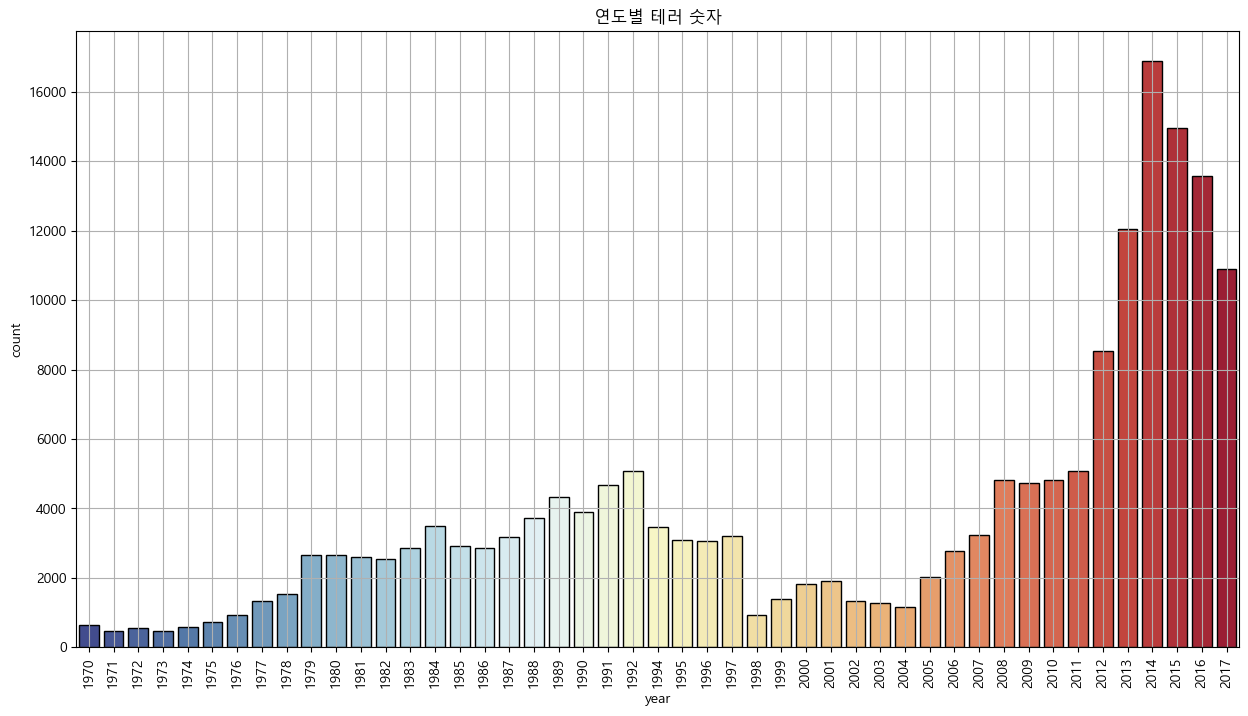

In [8]:
# 연도별 테러 숫자 시각화

plt.subplots(figsize=(15,8))
sns.countplot(x='year',data=terror,palette='RdYlBu_r',edgecolor='black')
plt.xticks(rotation=90)
plt.title('연도별 테러 숫자')
plt.grid(True)
plt.show()

* 2011년 기점으로 테러의 수가 급증하는 것을 시각적으로 확인할 수 있다.

* 2011년에는 중동에 크고 작은 이슈들이 많았다. 예를 들어 아랍의 봄과 같은 중동의 민주화 봉기로 사회적 불안으로 인한 ISIS와 같은 극단주의 단체들의 발전의 발판을 마련하게 된 계기가 되었다.

* 또한 계속되는 시리아 내전으로 인한 영향도 무시할 수 없었으며 급부상한 Social media로 인해 극단주의 단체들의 메시지와 영향력이 전세계로 전달될 수 있게 되면서 더 큰 혼란이 야기된 점도 원인이 될 수 있다고 예상할 수 있다.

### 2. 테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화

In [9]:
terror.head(2)

year  month  day           country_t                     region_t  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   

            city   latitude  longitude                  attack_type  killed  \
0  Santo Domingo  18.456792 -69.951164                Assassination     1.0   
1    Mexico city  19.371887 -99.086624  Hostage Taking (Kidnapping)     0.0   

   wounded                   target summary  \
0      0.0             Julio Guzman     NaN   
1      0.0  Nadine Chaval, daughter     NaN   

                                group                  target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   

  weapon_type motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0

In [10]:
terror_country_count = terror.pivot_table(index='country_t',values='attack_type',aggfunc=len)
terror_country_count

attack_type
country_t               
Afghanistan        12731
Albania               80
Algeria             2743
Andorra                1
Angola               499
...                  ...
Yemen               3347
Yugoslavia           203
Zaire                 50
Zambia                62
Zimbabwe             101

[205 rows x 1 columns]

In [11]:
terror_country_count.sort_values(by='attack_type',ascending=False,inplace=True)
terror_country_count

attack_type
country_t                       
Iraq                       24636
Pakistan                   14368
Afghanistan                12731
India                      11960
Colombia                    8306
...                          ...
Antigua and Barbuda            1
New Hebrides                   1
St. Lucia                      1
South Vietnam                  1
North Korea                    1

[205 rows x 1 columns]

In [12]:
terror_country_count.head(10)

attack_type
country_t                  
Iraq                  24636
Pakistan              14368
Afghanistan           12731
India                 11960
Colombia               8306
Philippines            6908
Peru                   6096
El Salvador            5320
United Kingdom         5235
Turkey                 4292

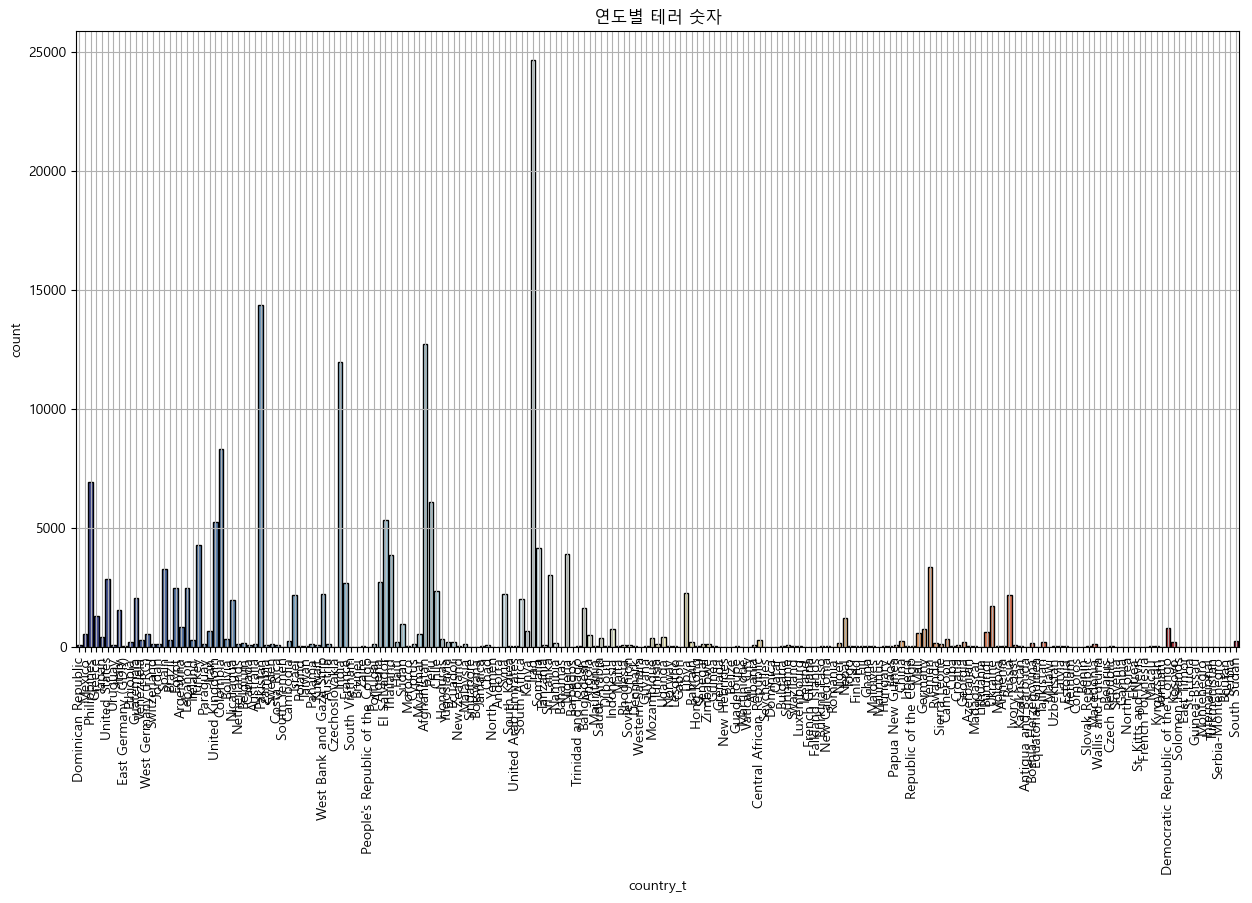

In [13]:
# 국가별 테러 숫자 시각화

plt.subplots(figsize=(15,8))
sns.countplot(x='country_t',data=terror,palette='RdYlBu_r',edgecolor='black')
plt.xticks(rotation=90)
plt.title('연도별 테러 숫자')
plt.grid(True)
plt.show()

In [14]:
terror['country_t'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_t, Length: 205, dtype: int64

In [15]:
terror['country_t'].value_counts()[:10].index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object')

In [16]:
terror['country_t'].value_counts()[:10].values

array([24636, 14368, 12731, 11960,  8306,  6908,  6096,  5320,  5235,
        4292], dtype=int64)

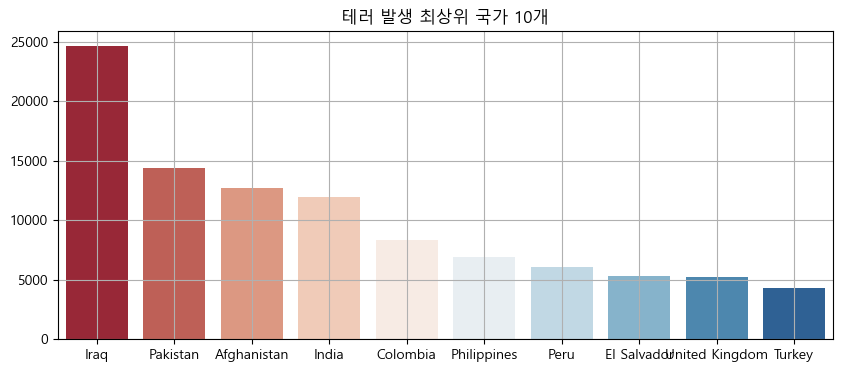

In [17]:
plt.subplots(figsize=(10,4))
sns.barplot(x=terror['country_t'].value_counts()[:10].index ,y=terror['country_t'].value_counts()[:10].values ,palette='RdBu')
plt.title('테러 발생 최상위 국가 10개')
plt.grid(True)
plt.show()

### 3. 국가별 사망자 수와 부상자 수를 구분하여 시각화

In [18]:
for i in terror.columns:
    print(i)

year
month
day
country_t
region_t
city
latitude
longitude
attack_type
killed
wounded
target
summary
group
target_type
weapon_type
motive
casualities


In [19]:
terror['country_t'].value_counts()[:10].index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object')

In [20]:
terror_top10 = terror[terror['country_t'].isin(terror['country_t'].value_counts()[:10].index)].copy()

In [21]:
terror_top10

year  month  day    country_t        region_t           city  \
2       1970      1    0  Philippines  Southeast Asia        Unknown   
26      1970      1   21  Philippines  Southeast Asia    Quezon City   
39      1970      1   31  Philippines  Southeast Asia         Bamban   
96      1970      3    0  Philippines  Southeast Asia         Manila   
150     1970      3   24  Philippines  Southeast Asia        Angeles   
...      ...    ...  ...          ...             ...            ...   
181684  2017     12   31        India      South Asia        Hungrum   
181685  2017     12   31  Afghanistan      South Asia        Maymana   
181688  2017     12   31  Philippines  Southeast Asia       Kubentog   
181689  2017     12   31        India      South Asia         Imphal   
181690  2017     12   31  Philippines  Southeast Asia  Cotabato City   

         latitude   longitude                     attack_type  killed  \
2       15.478598  120.599741                   Assassination     1.0   
26      14.674280  121.057495               Bombing/Explosion     0.0   
39      15.675051  120.331618                         Unknown     0.0   
96      14.596051  120.978666               Bombing/Explosion     0.0   
150     15.153002  120.591942                         Unknown     1.0   
...           ...         ...                             ...     ...   
181684  25.180162   93.015788     Hostage Taking (Kidnapping)     0.0   
181685  35.921051   64.774544               Bombing/Explosion     0.0   
181688   6.900742  124.437908  Facility/Infrastructure Attack     0.0   
181689  24.798346   93.940430               Bombing/Explosion     0.0   
181690   7.209594  124.241966               Bombing/Explosion     0.0   

        wounded                                             target  \
2           0.0                                           Employee   
26          0.0                                          JUSMAG HQ   
39          1.0                                             Seaman   
96          0.0                                       U.S. Embassy   
150         0.0                                            officer   
...         ...                                                ...   
181684      0.0  Personal Security Officer of Council Member Ih...   
181685      4.0                                       Jewelry Shop   
181688      0.0                                             Houses   
181689      0.0                                             Office   
181690      0.0                                            Unknown   

                                                  summary  \
2                                                     NaN   
26                                                    NaN   
39                                                    NaN   
96                                                    NaN   
150                                                   NaN   
...                                                   ...   
181684  12/31/2017: Assailants abducted Prafulla Phuka...   
181685  12/31/2017: An explosive device detonated at a...   
181688  12/31/2017: Assailants set fire to houses in K...   
181689  12/31/2017: Assailants threw a grenade at a Fo...   
181690  12/31/2017: An explosive device was discovered...   

                                             group  \
2                                          Unknown   
26                                         Unknown   
39                         New People's Army (NPA)   
96                                         Unknown   
150                                        Unknown   
...                                            ...   
181684                    Zeliangrong United Front   
181685                                     Unknown   
181688  Bangsamoro Islamic Freedom Movement (BIFM)   
181689                                     Unknown   
181690                                     Unknown   

                        target_type weapon_

In [22]:
terror_top10_pivot = terror_top10.pivot_table(index='country_t',values=['killed','wounded','casualities'],aggfunc=[sum,len])
terror_top10_pivot

sum                            len               
               casualities   killed   wounded casualities killed wounded
country_t                                                               
Afghanistan        80213.0  39384.0   44277.0       12731  12731   12731
Colombia           23767.0  14698.0   10328.0        8306   8306    8306
El Salvador        16181.0  12053.0    5062.0        5320   5320    5320
India              47108.0  19341.0   28980.0       11960  11960   11960
Iraq              202982.0  78589.0  134690.0       24636  24636   24636
Pakistan           64427.0  23822.0   42038.0       14368  14368   14368
Peru               16246.0  12771.0    4078.0        6096   6096    6096
Philippines        22361.0   9559.0   13367.0        6908   6908    6908
Turkey             16694.0   6888.0    9899.0        4292   4292    4292
United Kingdom      7591.0   3410.0    6106.0        5235   5235    5235

In [23]:
terror_top10_pivot.columns = terror_top10_pivot.columns.droplevel(0)

In [24]:
terror_top10_pivot.columns = ['casualities', 'killed', 'wounded', 'casualities_len', 'killed_len', 'wounded_len']

In [25]:
terror_top10_pivot.drop(columns=['killed_len','wounded_len'],inplace=True)
terror_top10_pivot

casualities   killed   wounded  casualities_len
country_t                                                      
Afghanistan         80213.0  39384.0   44277.0            12731
Colombia            23767.0  14698.0   10328.0             8306
El Salvador         16181.0  12053.0    5062.0             5320
India               47108.0  19341.0   28980.0            11960
Iraq               202982.0  78589.0  134690.0            24636
Pakistan            64427.0  23822.0   42038.0            14368
Peru                16246.0  12771.0    4078.0             6096
Philippines         22361.0   9559.0   13367.0             6908
Turkey              16694.0   6888.0    9899.0             4292
United Kingdom       7591.0   3410.0    6106.0             5235

In [26]:
terror_top10_pivot.rename(columns=({'casualities_len':'terror_count'}),inplace=True)
terror_top10_pivot

casualities   killed   wounded  terror_count
country_t                                                   
Afghanistan         80213.0  39384.0   44277.0         12731
Colombia            23767.0  14698.0   10328.0          8306
El Salvador         16181.0  12053.0    5062.0          5320
India               47108.0  19341.0   28980.0         11960
Iraq               202982.0  78589.0  134690.0         24636
Pakistan            64427.0  23822.0   42038.0         14368
Peru                16246.0  12771.0    4078.0          6096
Philippines         22361.0   9559.0   13367.0          6908
Turkey              16694.0   6888.0    9899.0          4292
United Kingdom       7591.0   3410.0    6106.0          5235

In [27]:
terror_top10_pivot.sort_values(by='terror_count',ascending=False,inplace=True)
terror_top10_pivot

casualities   killed   wounded  terror_count
country_t                                                   
Iraq               202982.0  78589.0  134690.0         24636
Pakistan            64427.0  23822.0   42038.0         14368
Afghanistan         80213.0  39384.0   44277.0         12731
India               47108.0  19341.0   28980.0         11960
Colombia            23767.0  14698.0   10328.0          8306
Philippines         22361.0   9559.0   13367.0          6908
Peru                16246.0  12771.0    4078.0          6096
El Salvador         16181.0  12053.0    5062.0          5320
United Kingdom       7591.0   3410.0    6106.0          5235
Turkey              16694.0   6888.0    9899.0          4292

In [28]:
# 테러 count 대비 casualities 비율 컬럼 추가 

terror_top10_pivot['casualities_per_terror']=terror_top10_pivot['casualities'] / terror_top10_pivot['terror_count']
terror_top10_pivot

casualities   killed   wounded  terror_count  \
country_t                                                      
Iraq               202982.0  78589.0  134690.0         24636   
Pakistan            64427.0  23822.0   42038.0         14368   
Afghanistan         80213.0  39384.0   44277.0         12731   
India               47108.0  19341.0   28980.0         11960   
Colombia            23767.0  14698.0   10328.0          8306   
Philippines         22361.0   9559.0   13367.0          6908   
Peru                16246.0  12771.0    4078.0          6096   
El Salvador         16181.0  12053.0    5062.0          5320   
United Kingdom       7591.0   3410.0    6106.0          5235   
Turkey              16694.0   6888.0    9899.0          4292   

                casualities_per_terror  
country_t                               
Iraq                          8.239243  
Pakistan                      4.484062  
Afghanistan                   6.300605  
India                         3.938796  
Colombia                      2.861425  
Philippines                   3.236972  
Peru                          2.665026  
El Salvador                   3.041541  
United Kingdom                1.450048  
Turkey                        3.889562

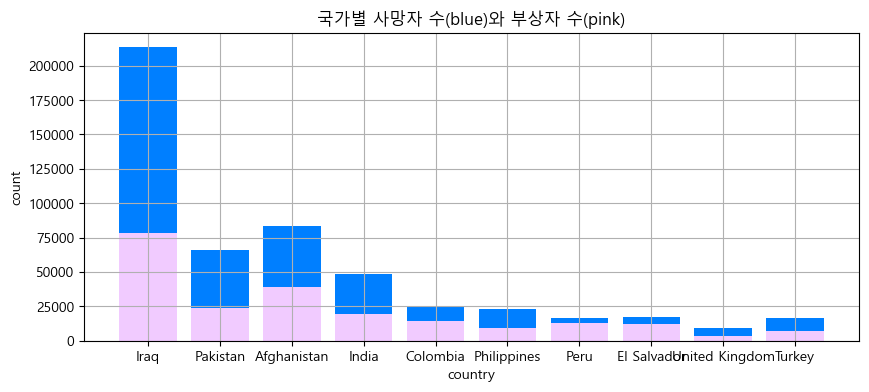

In [29]:
plt.subplots(figsize=(10,4))
plt.bar(x=terror_top10_pivot.index,height=terror_top10_pivot['killed'],color='#f1cbff')
plt.bar(x=terror_top10_pivot.index,height=terror_top10_pivot['wounded'],bottom=terror_top10_pivot['killed'],color='#007fff')
plt.xlabel('country')
plt.ylabel('count')
plt.title('국가별 사망자 수(blue)와 부상자 수(pink)')
plt.grid(True)
plt.show()

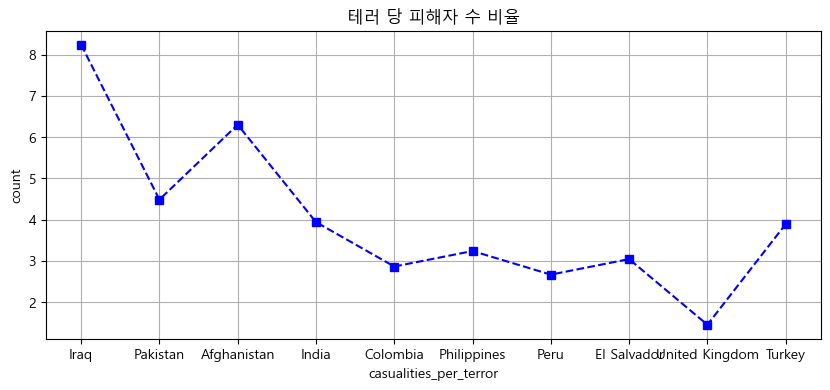

In [30]:
plt.subplots(figsize=(10,4))
plt.plot(terror_top10_pivot.index,terror_top10_pivot['casualities_per_terror'],'bs--')
plt.xlabel('casualities_per_terror')
plt.ylabel('count')
plt.title('테러 당 피해자 수 비율')
plt.grid(True)
plt.show()

### 4. 지역별 테러 특성 확인

In [31]:
terror.head()

year  month  day           country_t                     region_t  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                     attack_type  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   killed  wounded                   target summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                group                  target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  weapon_type motive  casualities  
0     Unknown    NaN          1.0  
1     Unknown    NaN          0.0  
2     Unknown    NaN          1.0  
3  Explosives    NaN          NaN  
4  Incendiary    NaN          NaN

In [32]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country_t    181691 non-null  object 
 4   region_t     181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   attack_type  181691 non-null  object 
 9   killed       171378 non-null  float64
 10  wounded      165380 non-null  float64
 11  target       181055 non-null  object 
 12  summary      115562 non-null  object 
 13  group        181691 non-null  object 
 14  target_type  181691 non-null  object 
 15  weapon_type  181691 non-null  object 
 16  motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [33]:
# 지역별 테러 종류

terror_conti = terror.pivot_table(index='region_t',columns='attack_type',values='country_t',aggfunc=len)
terror_conti

attack_type                  Armed Assault  Assassination  Bombing/Explosion  \
region_t                                                                       
Australasia & Oceania                   51             36                 75   
Central America & Caribbean           4361           1254               3239   
Central Asia                           116            115                235   
East Asia                              117             55                330   
Eastern Europe                        1274            400               2766   
Middle East & North Africa            9273           4206              30908   
North America                          448            255               1534   
South America                         3875           2745               9039   
South Asia                           11404           4301              21246   
Southeast Asia                        4022           1369               4818   
Sub-Saharan Africa                    6004           1638               5557   
Western Europe                        1724           2938               8508   

attack_type                  Facility/Infrastructure Attack  Hijacking  \
region_t                                                                 
Australasia & Oceania                                    71          3   
Central America & Caribbean                             403         26   
Central Asia                                             20          8   
East Asia                                               200         18   
Eastern Europe                                          260         26   
Middle East & North Africa                             1115        138   
North America                                           906         18   
South America                                           803         67   
South Asia                                             2189         93   
Southeast Asia                                          948         59   
Sub-Saharan Africa                                      810        136   
Western Europe                                         2631         67   

attack_type                  Hostage Taking (Barricade Incident)  \
region_t                                                           
Australasia & Oceania                                          6   
Central America & Caribbean                                  187   
Central Asia                                                   2   
East Asia                                                      3   
Eastern Europe                                                21   
Middle East & North Africa                                   100   
North America                                                 67   
South America                                                234   
South Asia                                                   120   
Southeast Asia                                                67   
Sub-Saharan Africa                                            95   
Western Europe                                                89   

attack_type                  Hostage Taking (Kidnapping)  Unarmed Assault  \
region_t                                                                    
Australasia & Oceania                                 13               11   
Central America & Caribbean                          501               19   
Central Asia                                          45                5   
East Asia                                             14               42   
Eastern Europe                                       220               62   
Middle East & North Africa                          2666              177   
North America                                        123               73   
South America                                       1414               47   
South Asia                                          3277              323   
Southeast Asia                            

In [34]:
terror_conti = terror_conti.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
terror_conti

attack_type                 Armed Assault  Assassination  Bombing/Explosion  \
region_t                                                                      
Middle East & North Africa           9273           4206              30908   
South Asia                          11404           4301              21246   
South America                        3875           2745               9039   
Western Europe                       1724           2938               8508   
Southeast Asia                       4022           1369               4818   
Eastern Europe                       1274            400               2766   
North America                         448            255               1534   
East Asia                             117             55                330   

attack_type                 Facility/Infrastructure Attack  Hijacking  \
region_t                                                                
Middle East & North Africa                            1115        138   
South Asia                                            2189         93   
South America                                          803         67   
Western Europe                                        2631         67   
Southeast Asia                                         948         59   
Eastern Europe                                         260         26   
North America                                          906         18   
East Asia                                              200         18   

attack_type                 Hostage Taking (Barricade Incident)  \
region_t                                                          
Middle East & North Africa                                  100   
South Asia                                                  120   
South America                                               234   
Western Europe                                               89   
Southeast Asia                                               67   
Eastern Europe                                               21   
North America                                                67   
East Asia                                                     3   

attack_type                 Hostage Taking (Kidnapping)  Unarmed Assault  \
region_t                                                                   
Middle East & North Africa                         2666              177   
South Asia                                         3277              323   
South America                                      1414               47   
Western Europe                                      269              148   
Southeast Asia                                      744               25   
Eastern Europe                                      220               62   
North America                                       123               73   
East Asia                                            14               42   

attack_type                 Unknown  
region_t                             
Middle East & North Africa     1891  
South Asia                     2021  
South America                   754  
Western Europe                  265  
Southeast Asia                  433  
Eastern Europe                  115  
North America                    32  
East Asia                        23

Text(0, 0.5, 'Attack Type')

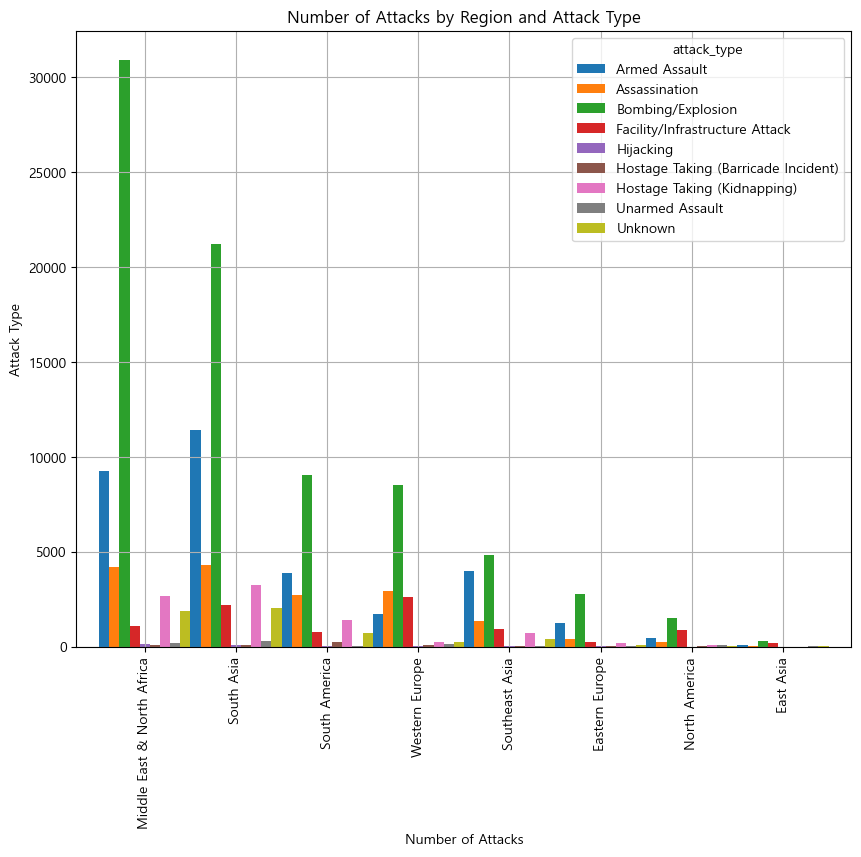

In [35]:
# 전체 확인

terror_conti.plot(kind='bar', stacked=False, figsize=(10,8),grid=True,width=1.0)
plt.title('Number of Attacks by Region and Attack Type')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')

* 전반적으로 모든 지역에서 폭탄테러로 인한 피해가 가장 많은 것으로 나타난다. 그 다음으로는 지역별로 차이가 있는 곳도 있지만 대부분 무기로 인한 피해가 많은 것으로 나타난다.

Text(0.5, 1.0, 'Percentage of Total Attacks by Region')

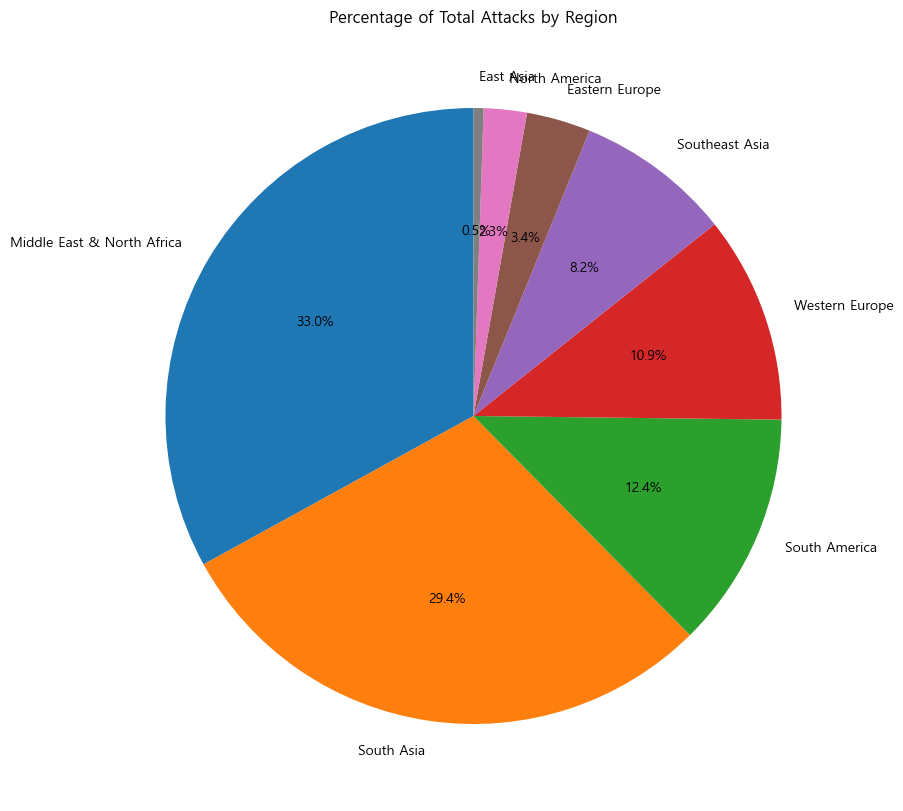

In [36]:
# 전체 지역 비율
terror_conti.sum(axis=1).plot(kind='pie', autopct='%1.1f%%', startangle=90,fontsize=10,figsize=(10,10))
plt.title('Percentage of Total Attacks by Region')

* 전체 비율로 보면 중동&북아프리카, 남아시아의 비율이 가장 높다.

In [37]:
#  지역별 사상자수 확인

terror_conti_2 = terror.pivot_table(index='region_t',values=['killed','wounded'],aggfunc=[sum,len])
terror_conti_2

sum              len        
                               killed   wounded killed wounded
region_t                                                      
Australasia & Oceania           150.0     260.0    282     282
Central America & Caribbean   28708.0    8991.0  10344   10344
Central Asia                   1000.0    2009.0    563     563
East Asia                      1152.0    9213.0    802     802
Eastern Europe                 7415.0   12045.0   5144    5144
Middle East & North Africa   137642.0  214308.0  50474   50474
North America                  4916.0   21531.0   3456    3456
South America                 28849.0   16704.0  18978   18978
South Asia                   101319.0  141360.0  44974   44974
Southeast Asia                15637.0   26259.0  12485   12485
Sub-Saharan Africa            78386.0   52857.0  17550   17550
Western Europe                 6694.0   18332.0  16639   16639

In [38]:
terror_conti_2.columns.droplevel(0)
terror_conti_2.columns = ['killed', 'wounded','killed_len', 'wounded_len']
terror_conti_2.drop(columns=['killed_len'],inplace=True)
terror_conti_2.rename(columns=({'wounded_len':'terror_count'}),inplace=True)
terror_conti_2 = terror_conti_2.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
terror_conti_2.sort_values(by='killed',ascending=False,inplace=True)
terror_conti_2

killed   wounded  terror_count
region_t                                                    
Middle East & North Africa  137642.0  214308.0         50474
South Asia                  101319.0  141360.0         44974
South America                28849.0   16704.0         18978
Southeast Asia               15637.0   26259.0         12485
Eastern Europe                7415.0   12045.0          5144
Western Europe                6694.0   18332.0         16639
North America                 4916.0   21531.0          3456
East Asia                     1152.0    9213.0           802

In [39]:
terror_conti_2['wounded_per_killed'] = terror_conti_2['wounded'] / terror_conti_2['killed']
terror_conti_2

killed   wounded  terror_count  \
region_t                                                       
Middle East & North Africa  137642.0  214308.0         50474   
South Asia                  101319.0  141360.0         44974   
South America                28849.0   16704.0         18978   
Southeast Asia               15637.0   26259.0         12485   
Eastern Europe                7415.0   12045.0          5144   
Western Europe                6694.0   18332.0         16639   
North America                 4916.0   21531.0          3456   
East Asia                     1152.0    9213.0           802   

                            wounded_per_killed  
region_t                                        
Middle East & North Africa            1.556996  
South Asia                            1.395197  
South America                         0.579015  
Southeast Asia                        1.679286  
Eastern Europe                        1.624410  
Western Europe                        2.738572  
North America                         4.379780  
East Asia                             7.997396

In [40]:
terror_conti_2.sort_values(by='killed',ascending=False,inplace=True)
terror_conti_2

killed   wounded  terror_count  \
region_t                                                       
Middle East & North Africa  137642.0  214308.0         50474   
South Asia                  101319.0  141360.0         44974   
South America                28849.0   16704.0         18978   
Southeast Asia               15637.0   26259.0         12485   
Eastern Europe                7415.0   12045.0          5144   
Western Europe                6694.0   18332.0         16639   
North America                 4916.0   21531.0          3456   
East Asia                     1152.0    9213.0           802   

                            wounded_per_killed  
region_t                                        
Middle East & North Africa            1.556996  
South Asia                            1.395197  
South America                         0.579015  
Southeast Asia                        1.679286  
Eastern Europe                        1.624410  
Western Europe                        2.738572  
North America                         4.379780  
East Asia                             7.997396

* 사상자 수는 테러의 수와 비례하여 중동&북아프리카, 남아시아가 높다. 상대적으로 테러 수가 적을수록 사상자 대비 부상자의 비율이 높은 것으로 나타난다.

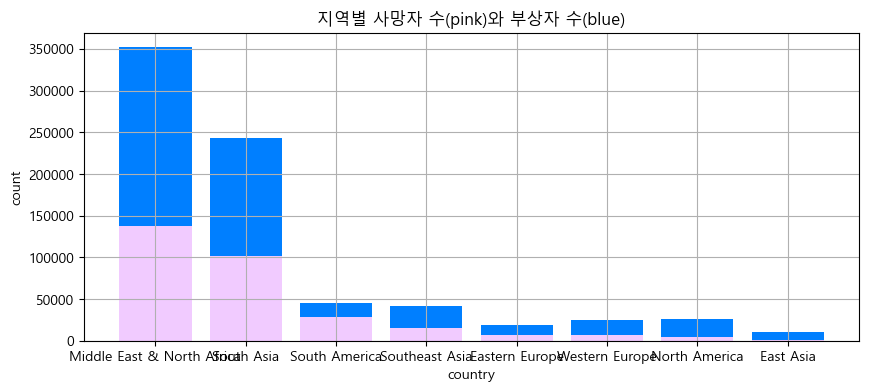

In [70]:
plt.subplots(figsize=(10,4))
plt.bar(x=terror_conti_2.index,height=terror_conti_2['killed'],color='#f1cbff')
plt.bar(x=terror_conti_2.index,height=terror_conti_2['wounded'],bottom=terror_conti_2['killed'],color='#007fff')
plt.xlabel('country')
plt.ylabel('count')
plt.title('지역별 사망자 수(pink)와 부상자 수(blue)')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Percentage of Total Attacks in Middle East & North Africa by Attack Type')

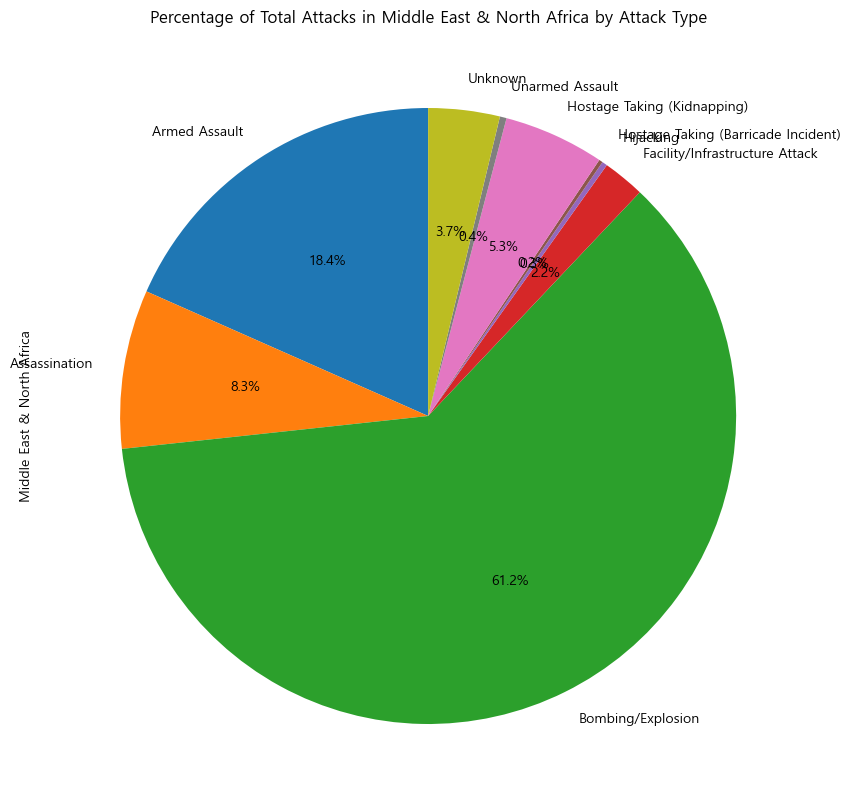

In [42]:
# 중동&북아프리카

terror_conti.loc['Middle East & North Africa'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10))
plt.title('Percentage of Total Attacks in Middle East & North Africa by Attack Type')

* 중동&북아프리카 폭발로 인한 테러가 대부분을 차지하는 것으로 나타난다. 또한 무기로 인한 테러도 다수를 차지하여 직접적인 공격으로 인명피해가 높은 것으로 나타난다.

Text(0.5, 1.0, 'Percentage of Total Attacks in South Asia by Attack Type')

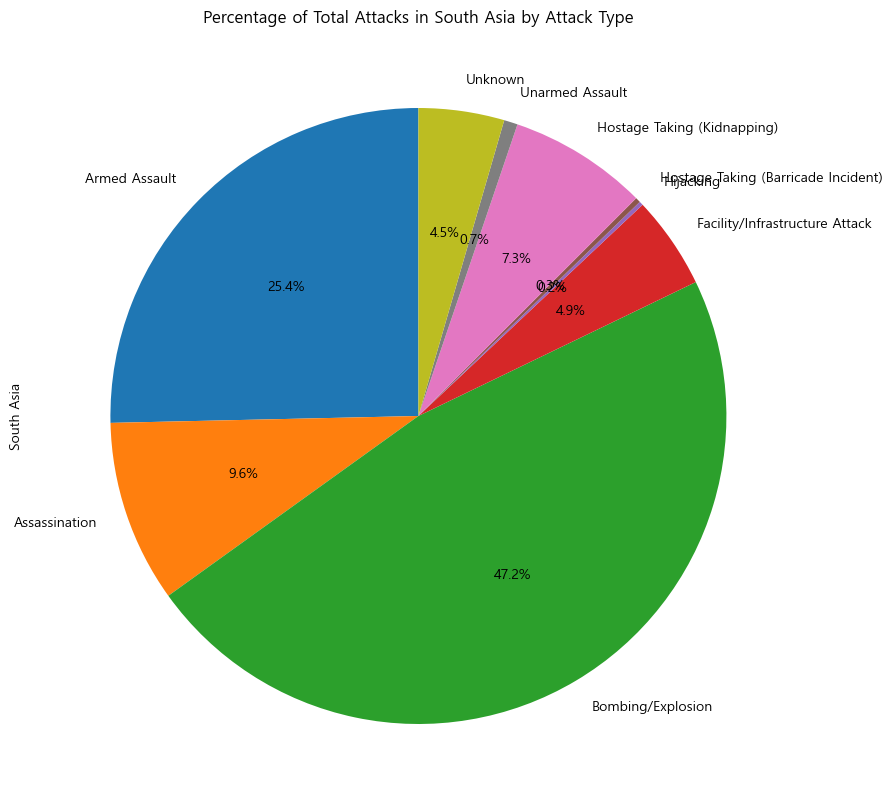

In [43]:
# 남아시아

terror_conti.loc['South Asia'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10))
plt.title('Percentage of Total Attacks in South Asia by Attack Type')

* 남아시아의 경우도 중동,북아프리카와 비슷한 형태의 구성으로 부상자 사상자 비율에서도 비슷한 형태를 보인다.

Text(0.5, 1.0, 'Percentage of Total Attacks in South America by Attack Type')

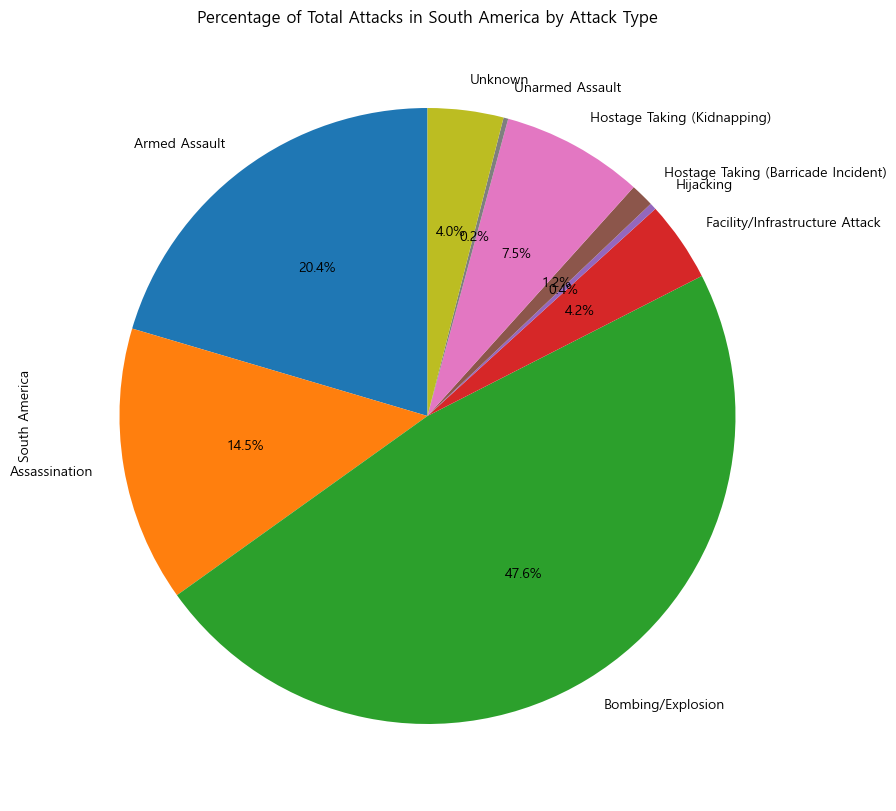

In [44]:
# 남아메리카

terror_conti.loc['South America'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10))
plt.title('Percentage of Total Attacks in South America by Attack Type')

* 남아메리카의 경우 역시 폭탄테러 및 무기를 통한 테러가 다수를 차지하고 있지만 암살이 차지하는 비율이 다른 지역에 비해서 매우 높은 것으로 나타난다. 암살의 경우 특정 대상에 대한 테러이기 때문에 부상보다는 사살되는 경우가 많기 때문에 테러 수 대비 피해자 수가 적은 것으로 판단된다.

Text(0.5, 1.0, 'Percentage of Total Attacks in Western Europe by Attack Type')

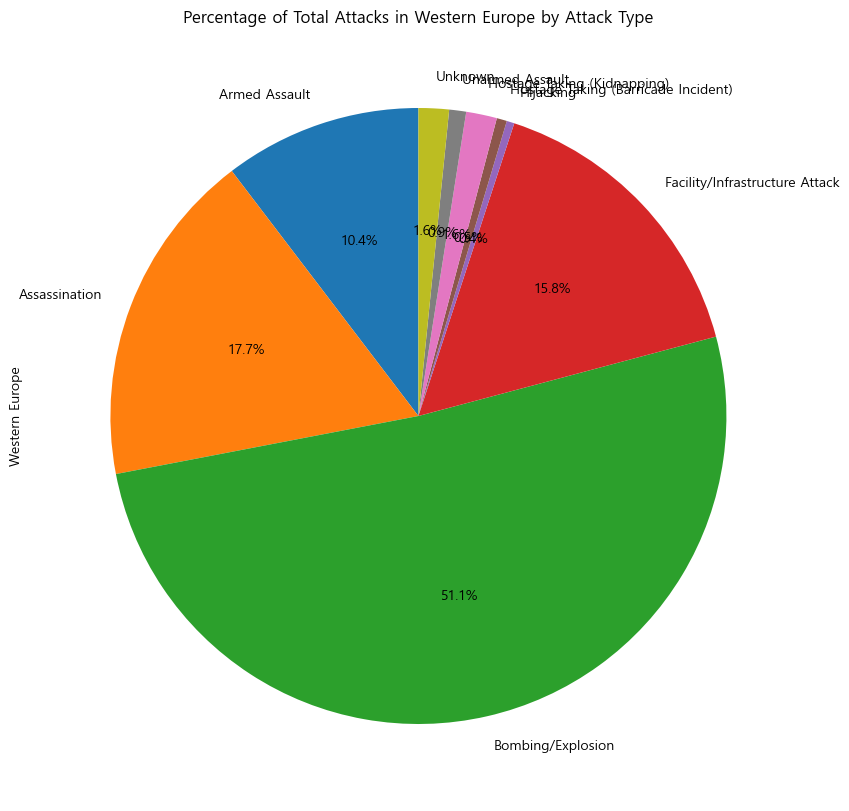

In [45]:
# 서유럽

terror_conti.loc['Western Europe'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10))
plt.title('Percentage of Total Attacks in Western Europe by Attack Type')

* 서유럽의 경우는 2,3위가 암살과 시설공격으로 나온다. 암살로 인해 사망자의 비율이 높으며 시설공격의 경우 인구밀집도가 높은 곳을 타겟으로 한 테러가 많지만 직접피해보다는 간접적인 피해가 많기 때문에 부상자가 많다.

Text(0.5, 1.0, 'Percentage of Total Attacks in Southeast Asia by Attack Type')

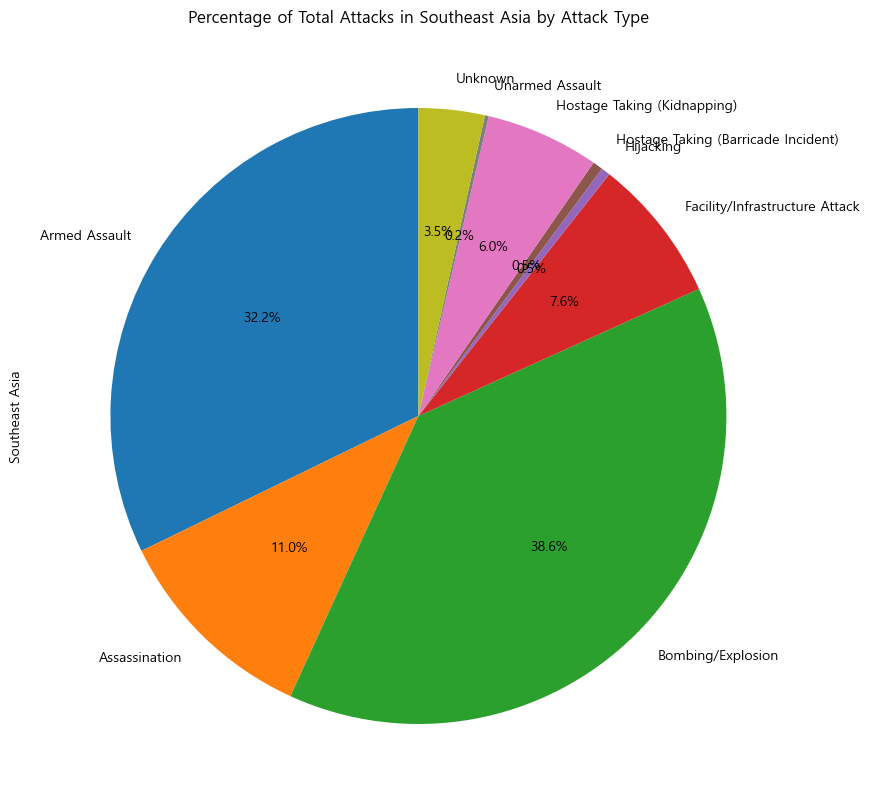

In [46]:
# 남동아시아

terror_conti.loc['Southeast Asia'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10))
plt.title('Percentage of Total Attacks in Southeast Asia by Attack Type')

* 남동아시아는 중동 쪽이나 서방국가와는 다른 양상을 보이는 듯 하다.

Text(0.5, 1.0, 'Percentage of Total Attacks in Eastern Europe by Attack Type')

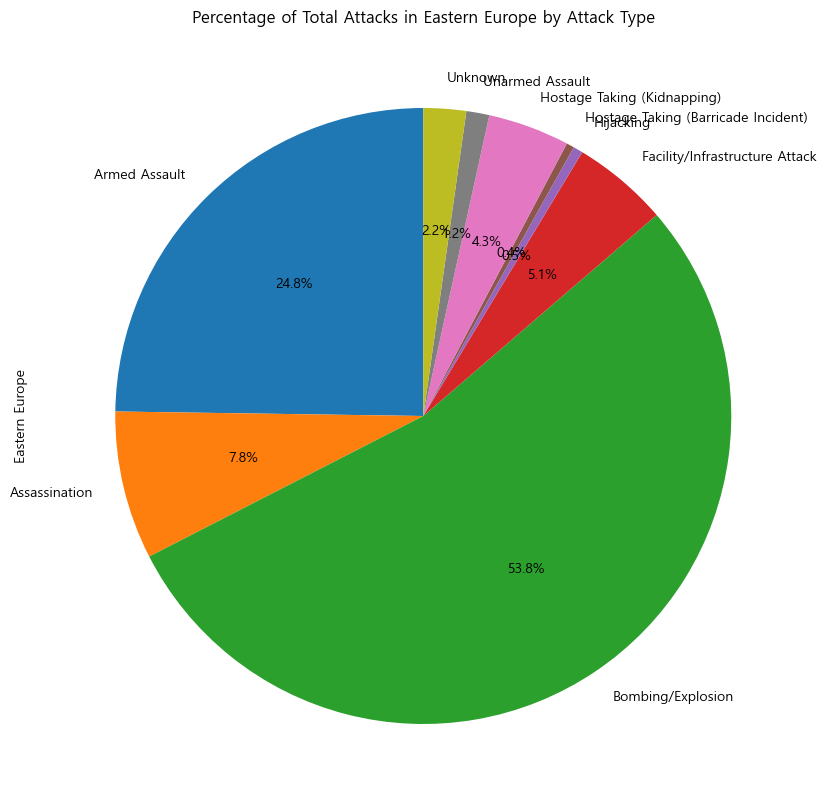

In [47]:
# 동유럽

terror_conti.loc['Eastern Europe'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10))
plt.title('Percentage of Total Attacks in Eastern Europe by Attack Type')

Text(0.5, 1.0, 'Percentage of Total Attacks in North America by Attack Type')

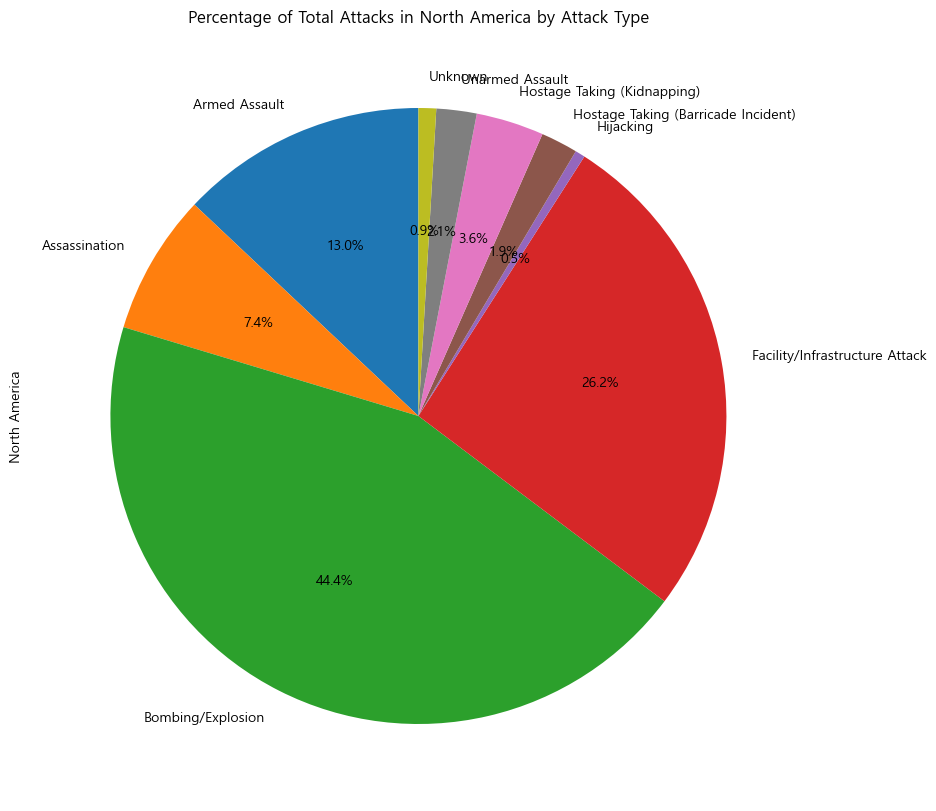

In [48]:
# 북아메리카

terror_conti.loc['North America'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10))
plt.title('Percentage of Total Attacks in North America by Attack Type')

* 시설공격의 비율이 높으며 이로인해 부상자 비율이 높은 것을 알 수 있다.

Text(0.5, 1.0, 'Percentage of Total Attacks in East Asia by Attack Type')

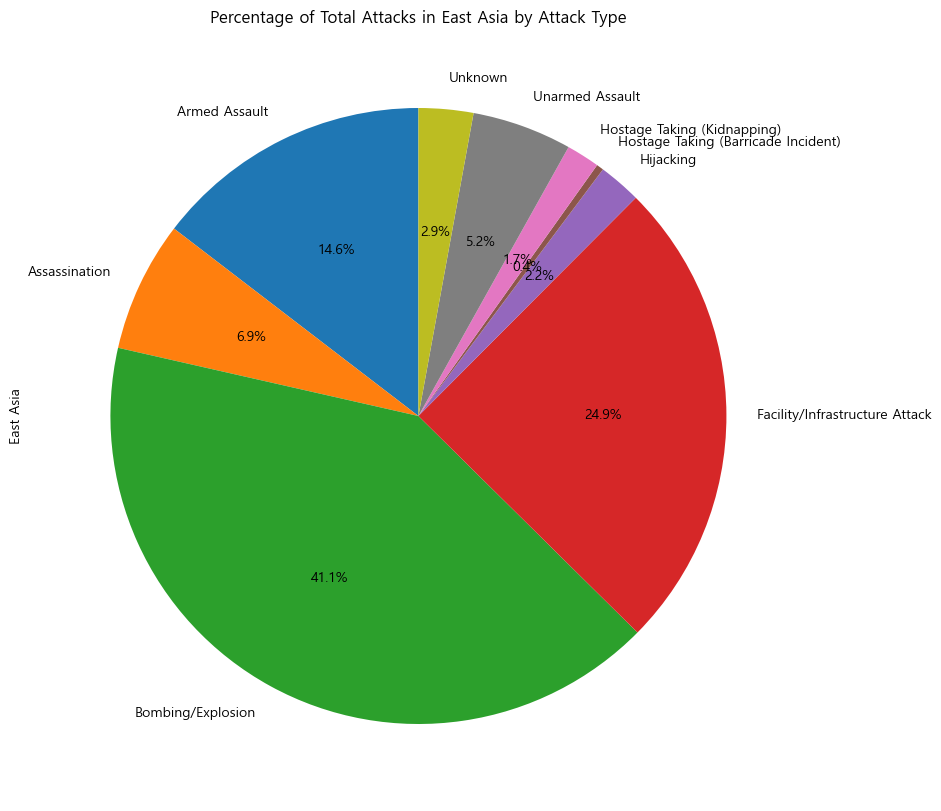

In [49]:
# 동아시아

terror_conti.loc['East Asia'].plot(kind='pie', autopct='%1.1f%%', startangle=90,figsize=(10,10))
plt.title('Percentage of Total Attacks in East Asia by Attack Type')

* 동아시아 또한 시설공격 비율이 상대적으로 높아 간접적인 부상자 비율이 높은 것을 알 수 있다.

### 5. 지역별 테러 2011년 기점으로 분석

In [51]:
terror_year = terror.pivot_table(index='region_t',columns='year',values='country_t',aggfunc=len)
terror_year

year                          1970   1971   1972   1973   1974   1975   1976  \
region_t                                                                       
Australasia & Oceania          1.0    1.0    8.0    1.0    1.0    NaN    NaN   
Central America & Caribbean    7.0    5.0    3.0    6.0   11.0    9.0   45.0   
Central Asia                   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
East Asia                      2.0    1.0    NaN    2.0    4.0   12.0    2.0   
Eastern Europe                12.0    5.0    1.0    1.0    2.0    NaN    NaN   
Middle East & North Africa    28.0   55.0   53.0   19.0   42.0   44.0   55.0   
North America                472.0  247.0   73.0   64.0  111.0  159.0  125.0   
South America                 65.0   24.0   33.0   83.0   81.0   55.0   91.0   
South Asia                     1.0    NaN    1.0    1.0    2.0    4.0    4.0   
Southeast Asia                10.0    6.0   16.0    2.0    3.0    7.0   12.0   
Sub-Saharan Africa             3.0    2.0    4.0    4.0    7.0   12.0   11.0   
Western Europe                50.0  125.0  376.0  290.0  317.0  438.0  578.0   

year                          1977   1978    1979  ...    2008    2009  \
region_t                                           ...                   
Australasia & Oceania          NaN    2.0     2.0  ...     8.0     1.0   
Central America & Caribbean   24.0  199.0   609.0  ...     NaN     9.0   
Central Asia                   NaN    NaN     NaN  ...    36.0    31.0   
East Asia                      4.0   35.0    16.0  ...    25.0     8.0   
Eastern Europe                 2.0    2.0     1.0  ...   209.0   165.0   
Middle East & North Africa   211.0  128.0   455.0  ...  1536.0  1361.0   
North America                149.0  117.0    79.0  ...    31.0    16.0   
South America                119.0  222.0   236.0  ...   144.0   159.0   
South Asia                     2.0    2.0    34.0  ...  1759.0  1945.0   
Southeast Asia                 8.0   44.0    86.0  ...   514.0   561.0   
Sub-Saharan Africa            29.0   46.0   124.0  ...   380.0   283.0   
Western Europe               771.0  729.0  1020.0  ...   163.0   182.0   

year                           2010    2011    2012    2013    2014    2015  \
region_t                                                                      
Australasia & Oceania           1.0     NaN     NaN     1.0     9.0    14.0   
Central America & Caribbean     1.0     1.0     1.0    14.0     5.0     1.0   
Central Asia                    9.0     9.0    12.0     7.0     9.0    10.0   
East Asia                       1.0     4.0     4.0    15.0    43.0    28.0   
Eastern Europe                261.0   198.0   173.0   165.0   962.0   684.0   
Middle East & North Africa   1463.0  1663.0  2409.0  4560.0  6939.0  6036.0   
North America                  24.0    12.0    39.0    32.0    37.0    62.0   
South America                 148.0   106.0   133.0   182.0   283.0   176.0   
South Asia                   1981.0  2138.0  3803.0  4612.0  4998.0  4585.0   
Southeast Asia                473.0   356.0   587.0  1188.0  1082.0  1072.0   
Sub-Saharan Africa            331.0   494.0  1168.0   999.0  2321.0  1964.0   
Western Europe                133.0    95.0   193.0   261.0   215.0   333.0   

year                           2016    2017  
region_t                                     
Australasia & Oceania          10.0    12.0  
Central America & Caribbean     3.0     4.0  
Central Asia                   17.0     7.0  
East Asia                       8.0     7.0  
Eastern Europe                134.0   110.0  
Middle East & North Africa   6115.0  3780.0  
North America                  75.0    97.0  
South America                 159.0   172.0  
South Asia                   3639.0  3430.0  
Southeast Asia               1077.0  1020.0  
Sub-Saharan Africa           2077.0  1970.0  
Western Europe                273.0   291.0  

[12 rows x 47 columns]

In [62]:
terror_year = terror_year[[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017]]

Text(0, 0.5, 'Number of Attacks')

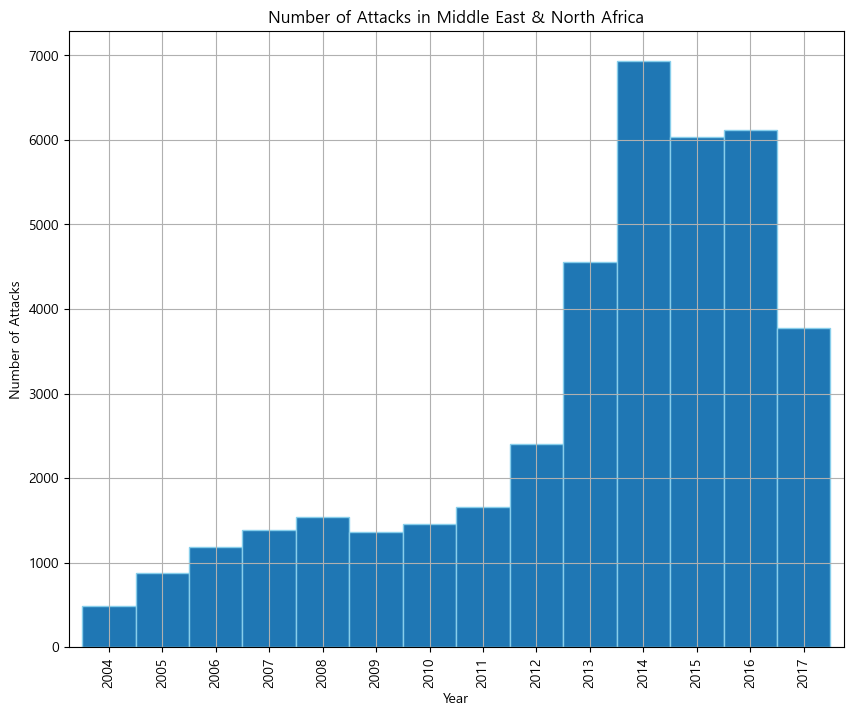

In [71]:
# 중동&북아프리카

terror_year.loc['Middle East & North Africa'].plot(kind='bar', figsize=(10,8),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

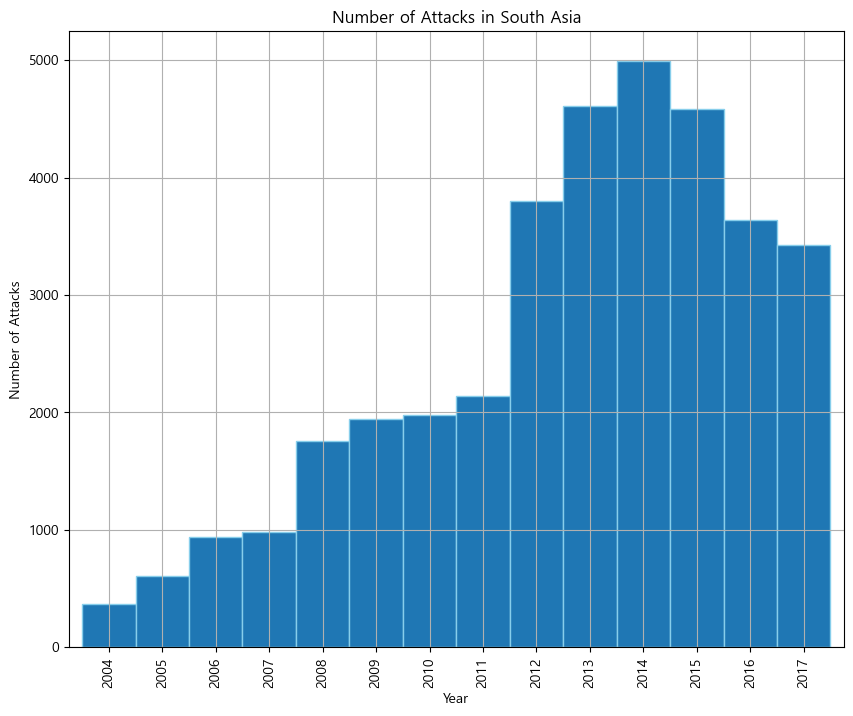

In [72]:
# 남아시아

terror_year.loc['South Asia'].plot(kind='bar', figsize=(10,8),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in South Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

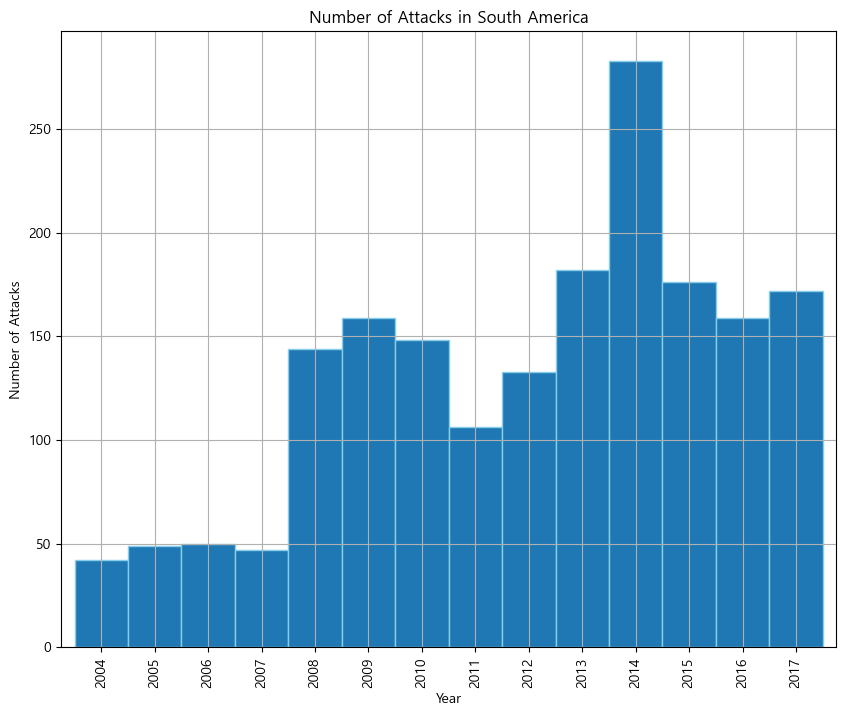

In [73]:
# 남아메리카

terror_year.loc['South America'].plot(kind='bar', figsize=(10,8),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in South America')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

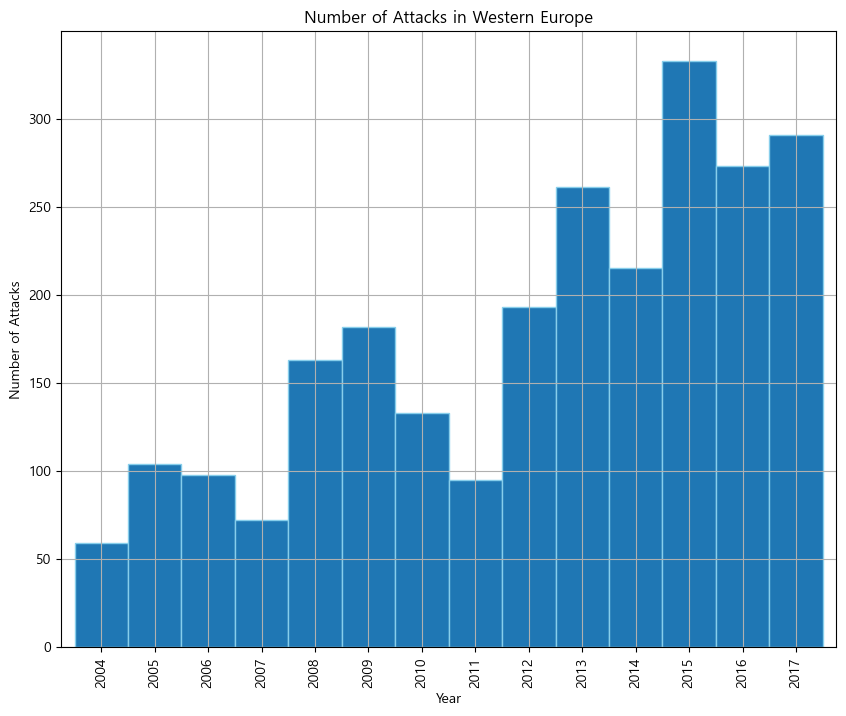

In [74]:
#  서유럽

terror_year.loc['Western Europe'].plot(kind='bar', figsize=(10,8),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Western Europe')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

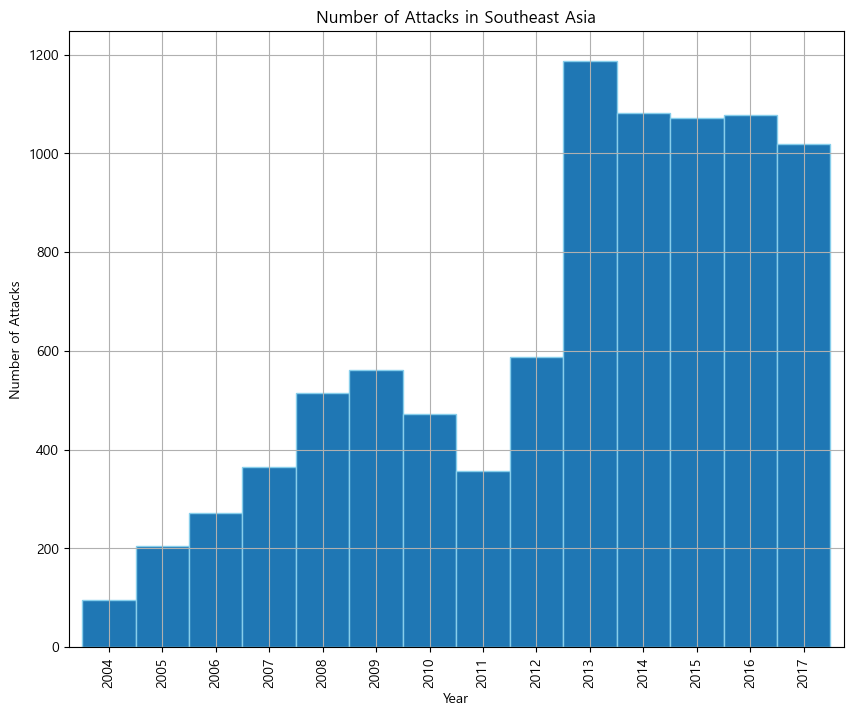

In [75]:
# 남동아시아

terror_year.loc['Southeast Asia'].plot(kind='bar', figsize=(10,8),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Southeast Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

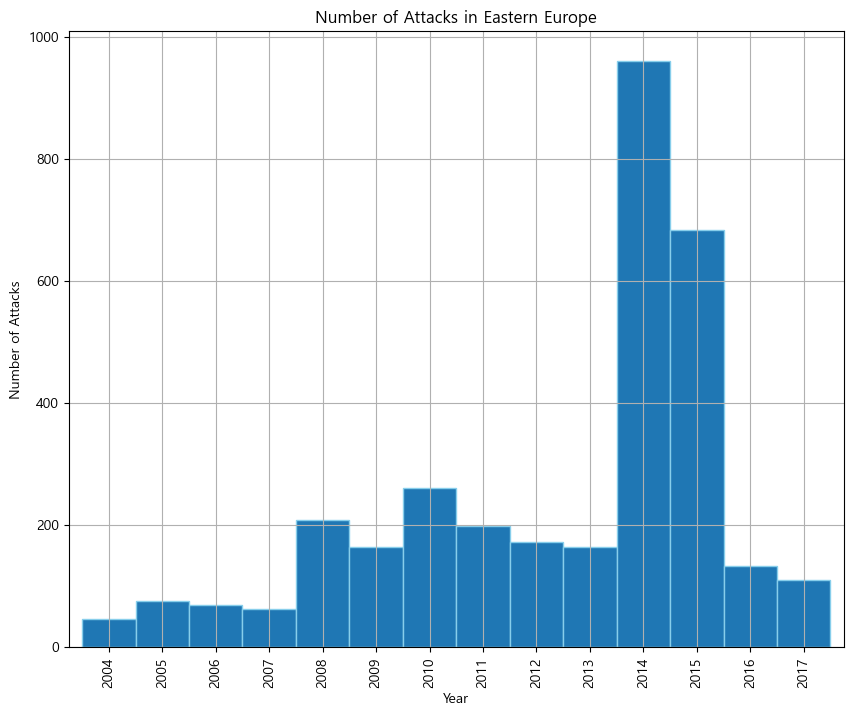

In [76]:
#  동유럽

terror_year.loc['Eastern Europe'].plot(kind='bar', figsize=(10,8),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Eastern Europe')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

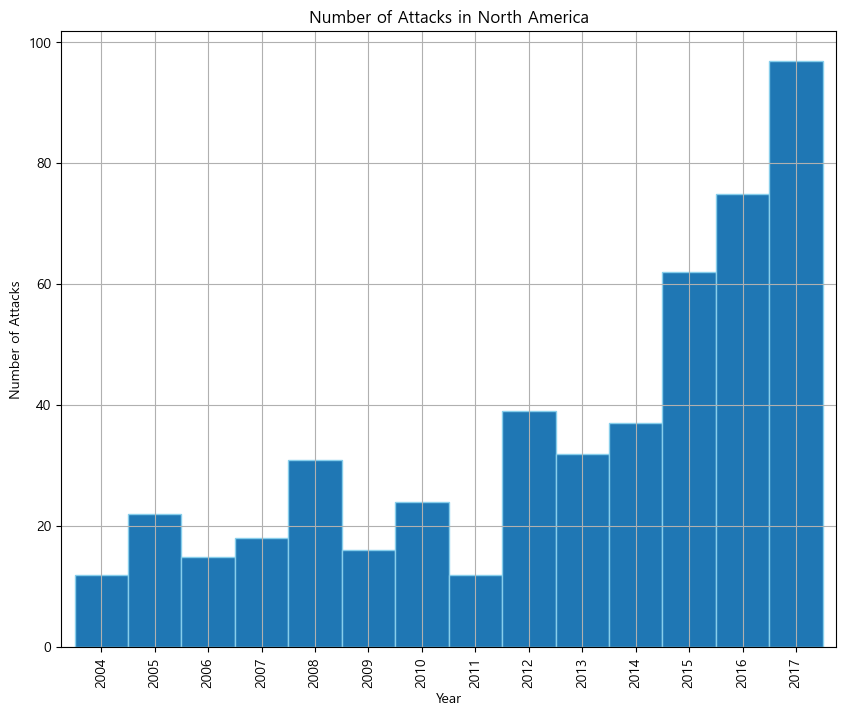

In [77]:
# 북아메리카

terror_year.loc['North America'].plot(kind='bar', figsize=(10,8),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in North America')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

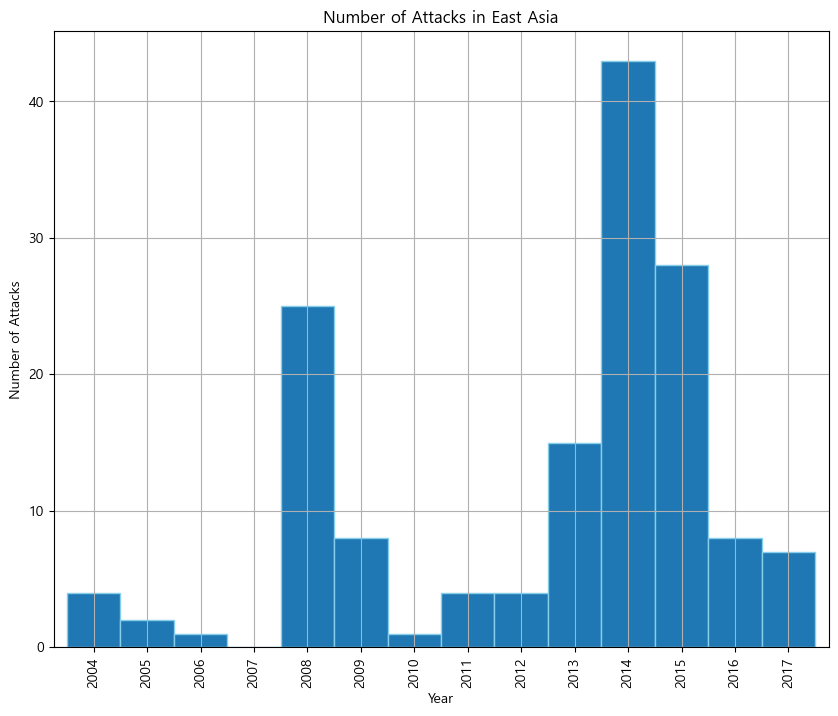

In [78]:
# 동아시아

terror_year.loc['East Asia'].plot(kind='bar', figsize=(10,8),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in East Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

* 2011~2013년 소폭 감소하다 2014년 급증한 동유럽을 제외한 모든 지역에서 2011년 이후 증가하거나 급증하는 양상을 보였다. 이렇듯 모든 지역에서 영향이 비슷하게 나타났다는 것은 테러 행위를 자극하는 기폭제가 존재했으며 그것이 전세계로 퍼질 수 있게 도와주는 연료가 존재했음을 예상할 수 있다. 

* 그 중 가장 크다고 판단되는 것은 문제 1에서도 제시했듯이 아랍의 봄과 같은 중동의 민주화 봉기로 사회적 불안으로 인한 ISIS와 같은 극단주의 단체들의 발전의 발판을 마련하게 된 계기가 된 것이 있으며.

* 또한 계속되는 시리아 내전으로 인한 영향으로 정부군의 힘이 축소된 상황에서 급부상한 Social media로 인해 극단주의 단체들의 메시지와 영향력이 전세계로 전달될 수 있게 되면서 더 큰 혼란이 야기된 점도 원인이라고 생각한다.

### 6.  70년대, 80년대, 90년대, 2000년대, 2010년대로 구분하여 특성을 분석

In [80]:
terror_year_all = terror.pivot_table(index='region_t',columns='year',values='country_t',aggfunc=len)
terror_year_all

year                          1970   1971   1972   1973   1974   1975   1976  \
region_t                                                                       
Australasia & Oceania          1.0    1.0    8.0    1.0    1.0    NaN    NaN   
Central America & Caribbean    7.0    5.0    3.0    6.0   11.0    9.0   45.0   
Central Asia                   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
East Asia                      2.0    1.0    NaN    2.0    4.0   12.0    2.0   
Eastern Europe                12.0    5.0    1.0    1.0    2.0    NaN    NaN   
Middle East & North Africa    28.0   55.0   53.0   19.0   42.0   44.0   55.0   
North America                472.0  247.0   73.0   64.0  111.0  159.0  125.0   
South America                 65.0   24.0   33.0   83.0   81.0   55.0   91.0   
South Asia                     1.0    NaN    1.0    1.0    2.0    4.0    4.0   
Southeast Asia                10.0    6.0   16.0    2.0    3.0    7.0   12.0   
Sub-Saharan Africa             3.0    2.0    4.0    4.0    7.0   12.0   11.0   
Western Europe                50.0  125.0  376.0  290.0  317.0  438.0  578.0   

year                          1977   1978    1979  ...    2008    2009  \
region_t                                           ...                   
Australasia & Oceania          NaN    2.0     2.0  ...     8.0     1.0   
Central America & Caribbean   24.0  199.0   609.0  ...     NaN     9.0   
Central Asia                   NaN    NaN     NaN  ...    36.0    31.0   
East Asia                      4.0   35.0    16.0  ...    25.0     8.0   
Eastern Europe                 2.0    2.0     1.0  ...   209.0   165.0   
Middle East & North Africa   211.0  128.0   455.0  ...  1536.0  1361.0   
North America                149.0  117.0    79.0  ...    31.0    16.0   
South America                119.0  222.0   236.0  ...   144.0   159.0   
South Asia                     2.0    2.0    34.0  ...  1759.0  1945.0   
Southeast Asia                 8.0   44.0    86.0  ...   514.0   561.0   
Sub-Saharan Africa            29.0   46.0   124.0  ...   380.0   283.0   
Western Europe               771.0  729.0  1020.0  ...   163.0   182.0   

year                           2010    2011    2012    2013    2014    2015  \
region_t                                                                      
Australasia & Oceania           1.0     NaN     NaN     1.0     9.0    14.0   
Central America & Caribbean     1.0     1.0     1.0    14.0     5.0     1.0   
Central Asia                    9.0     9.0    12.0     7.0     9.0    10.0   
East Asia                       1.0     4.0     4.0    15.0    43.0    28.0   
Eastern Europe                261.0   198.0   173.0   165.0   962.0   684.0   
Middle East & North Africa   1463.0  1663.0  2409.0  4560.0  6939.0  6036.0   
North America                  24.0    12.0    39.0    32.0    37.0    62.0   
South America                 148.0   106.0   133.0   182.0   283.0   176.0   
South Asia                   1981.0  2138.0  3803.0  4612.0  4998.0  4585.0   
Southeast Asia                473.0   356.0   587.0  1188.0  1082.0  1072.0   
Sub-Saharan Africa            331.0   494.0  1168.0   999.0  2321.0  1964.0   
Western Europe                133.0    95.0   193.0   261.0   215.0   333.0   

year                           2016    2017  
region_t                                     
Australasia & Oceania          10.0    12.0  
Central America & Caribbean     3.0     4.0  
Central Asia                   17.0     7.0  
East Asia                       8.0     7.0  
Eastern Europe                134.0   110.0  
Middle East & North Africa   6115.0  3780.0  
North America                  75.0    97.0  
South America                 159.0   172.0  
South Asia                   3639.0  3430.0  
Southeast Asia               1077.0  1020.0  
Sub-Saharan Africa           2077.0  1970.0  
Western Europe                273.0   291.0  

[12 rows x 47 columns]

In [82]:
terror_year_all.columns

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017],
           dtype='int64', name='year')

In [87]:
terror_year_70 = terror_year_all[[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979]]
terror_year_80 = terror_year_all[[1980,1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]]
terror_year_90 = terror_year_all[[1990, 1991,1992, 1994, 1995, 1996, 1997, 1998, 1999]]
terror_year_00 = terror_year_all[[2000, 2001, 2002, 2003,2004, 2005, 2006, 2007, 2008, 2009]]
terror_year_10 = terror_year_all[[2010, 2011, 2012, 2013, 2014,2015, 2016, 2017]]

Text(0, 0.5, 'Number of Attacks')

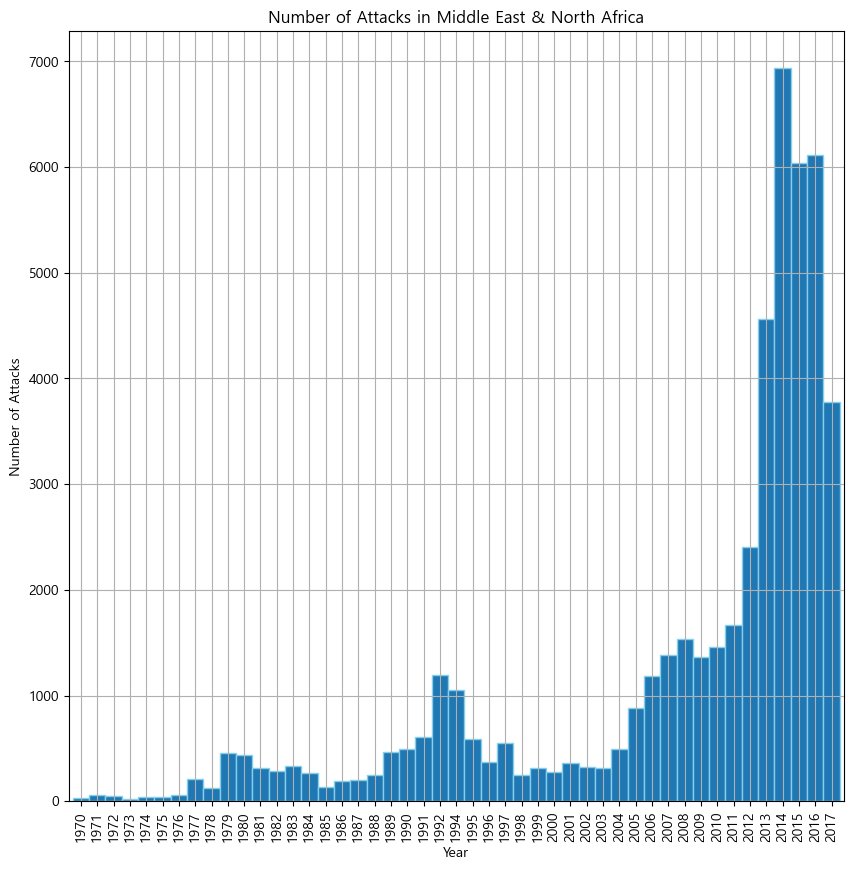

In [96]:
# 중동&북아프리카

terror_year_all.loc['Middle East & North Africa'].plot(kind='bar', figsize=(10,10),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

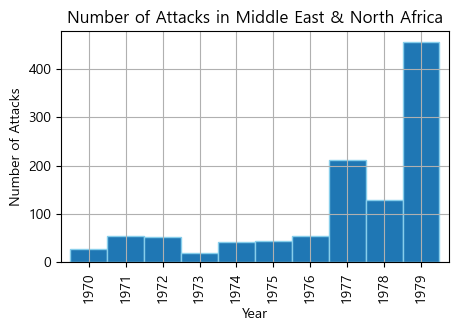

In [90]:


terror_year_70.loc['Middle East & North Africa'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

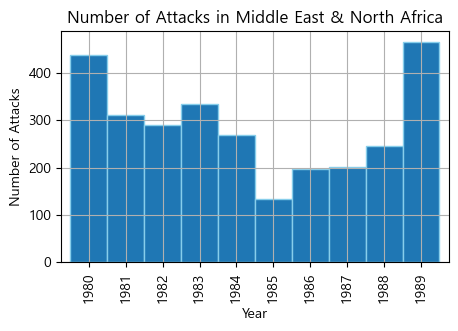

In [91]:
terror_year_80.loc['Middle East & North Africa'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

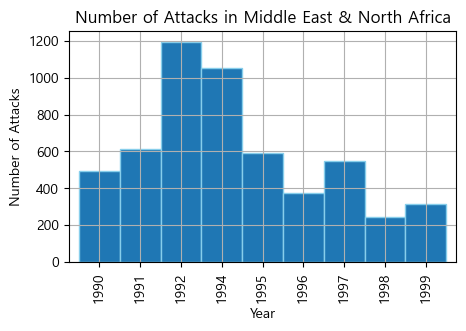

In [92]:
terror_year_90.loc['Middle East & North Africa'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

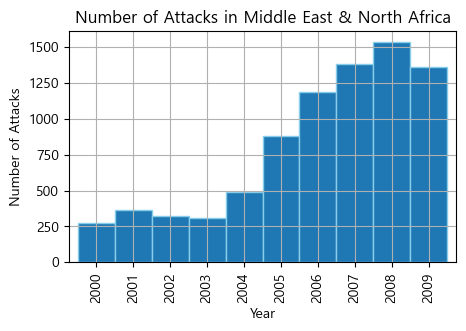

In [93]:
terror_year_00.loc['Middle East & North Africa'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

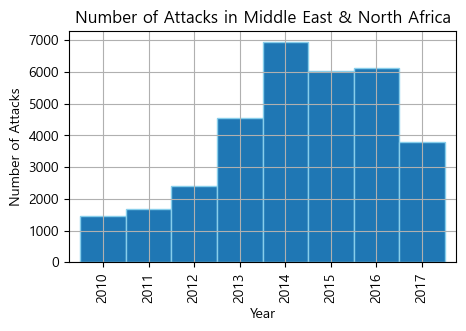

In [94]:
terror_year_10.loc['Middle East & North Africa'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Middle East & North Africa')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

* 중동&북아프리카의 경우 70년대 79년 급증하고 80년대 들어 조금 감소하다 80년대 후반 90년대 초까지 증가하다 다시 감소했습니다. 이후 2000년대 중후반에 들어서며 꾸준한 증가세에 들어가며 2010년대에 들어서는 급증하게 되었습니다.

---

Text(0, 0.5, 'Number of Attacks')

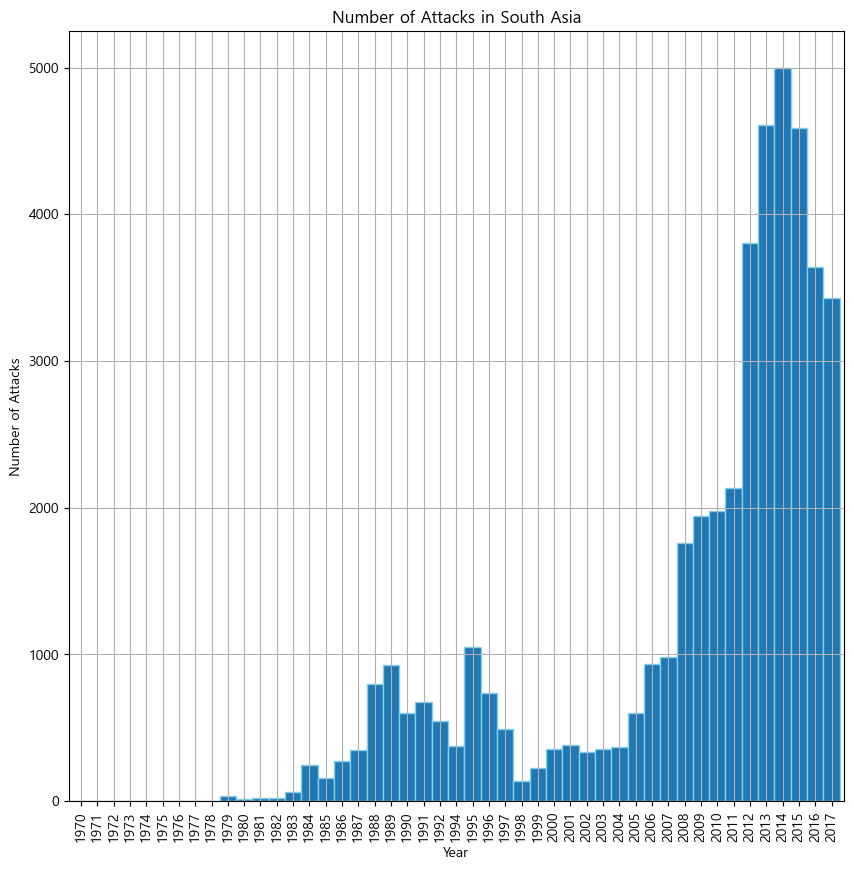

In [97]:
# 남아시아

terror_year_all.loc['South Asia'].plot(kind='bar', figsize=(10,10),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in South Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

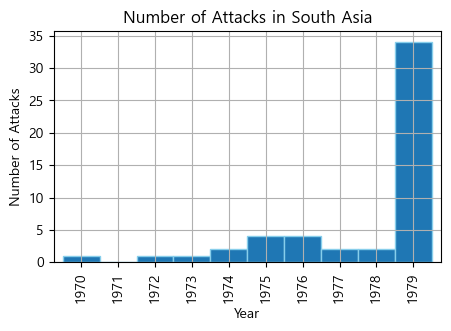

In [98]:


terror_year_70.loc['South Asia'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in South Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

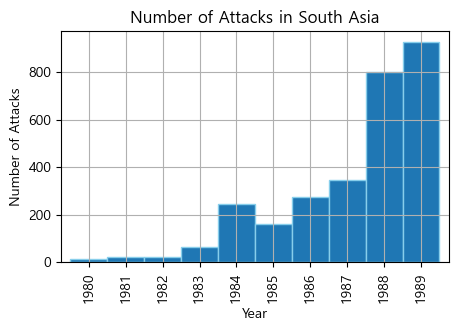

In [99]:
terror_year_80.loc['South Asia'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in South Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

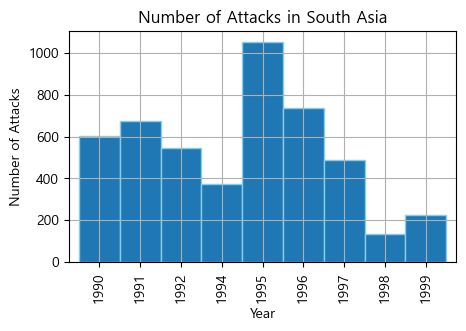

In [100]:
terror_year_90.loc['South Asia'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in South Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

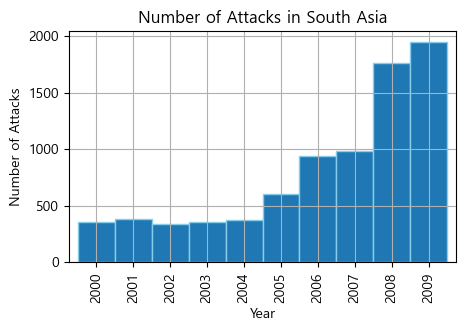

In [101]:
terror_year_00.loc['South Asia'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in South Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

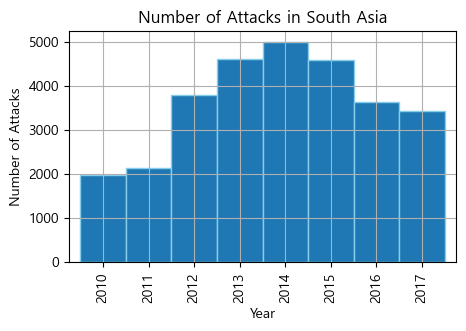

In [102]:
terror_year_10.loc['South Asia'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in South Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

* 남아시아의 경우 70년대 초에는 테러가 거의 없다가 말에 급증하여 80년대 꾸준한 증가세를 보입니다. 90년대는 다소 변화가 있지만 전체적으로 봤을때는 감소하는 형태를 보이다가 20년대 중반 이후부터 급증하여 2010년대에는 2014년 최대수를 기록하고 2017년에는 다소 줄어든 상황입니다.


---

Text(0, 0.5, 'Number of Attacks')

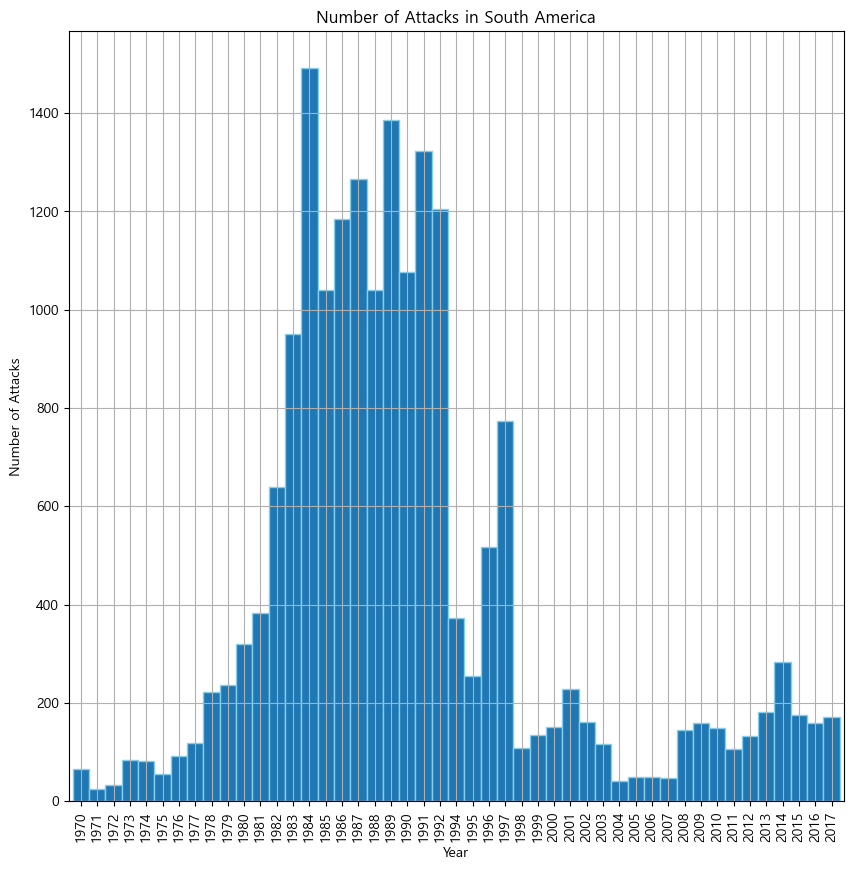

In [103]:
# 남아메리카

terror_year_all.loc['South America'].plot(kind='bar', figsize=(10,10),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in South America')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

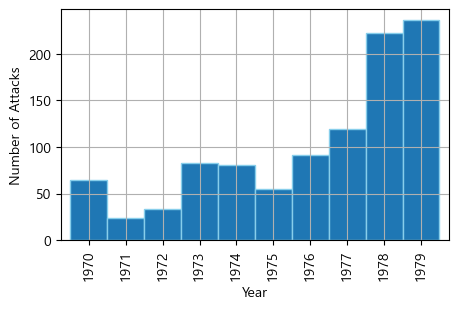

In [104]:


terror_year_70.loc['South America'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

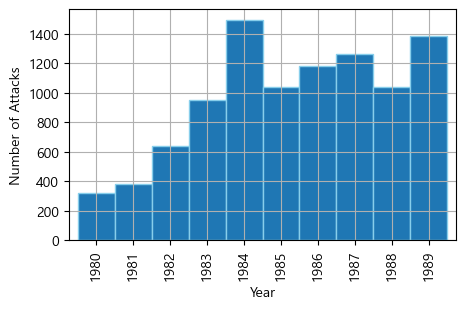

In [105]:
terror_year_80.loc['South America'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

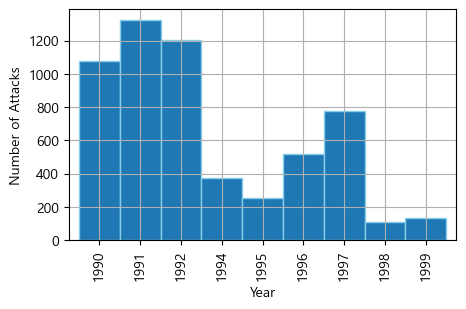

In [106]:
terror_year_90.loc['South America'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

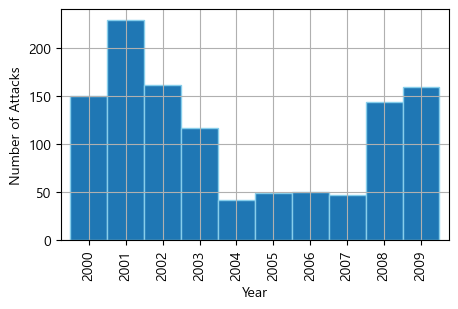

In [107]:
terror_year_00.loc['South America'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

Text(0, 0.5, 'Number of Attacks')

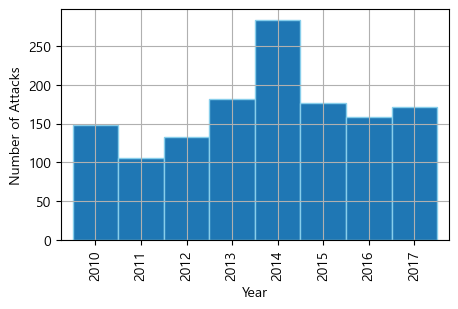

In [108]:
terror_year_10.loc['South America'].plot(kind='bar', figsize=(5,3),grid=True,width=1.0,edgecolor='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

* 남아메리카의 경우 70년대 말부터 해서 80년대 테러의 수가 급증한 것을 확인할 수 있습니다. 이시기는 당시 불안한 정부에 대항한 좌파 게릴라 단체가 다수 발생했으며 이로 인한 테러리즘이 활발했던 시기입니다. 또한 마약 카르텔과 미국의 압력으로 인한 혼란도 가중되었던 시기로 다수의 테러가 있었던 것으로 판단 됩니다. 이러한 테러는 90년대까지 이어지고 2000년대 들어 소강되었습니다. 그러나 2000년대 후반에 들어서며 약간의 증가세에 들어섰으며 2010년대는 약간 증가한 상태를 유지하고 있습니다. 

---

Text(0, 0.5, 'Number of Attacks')

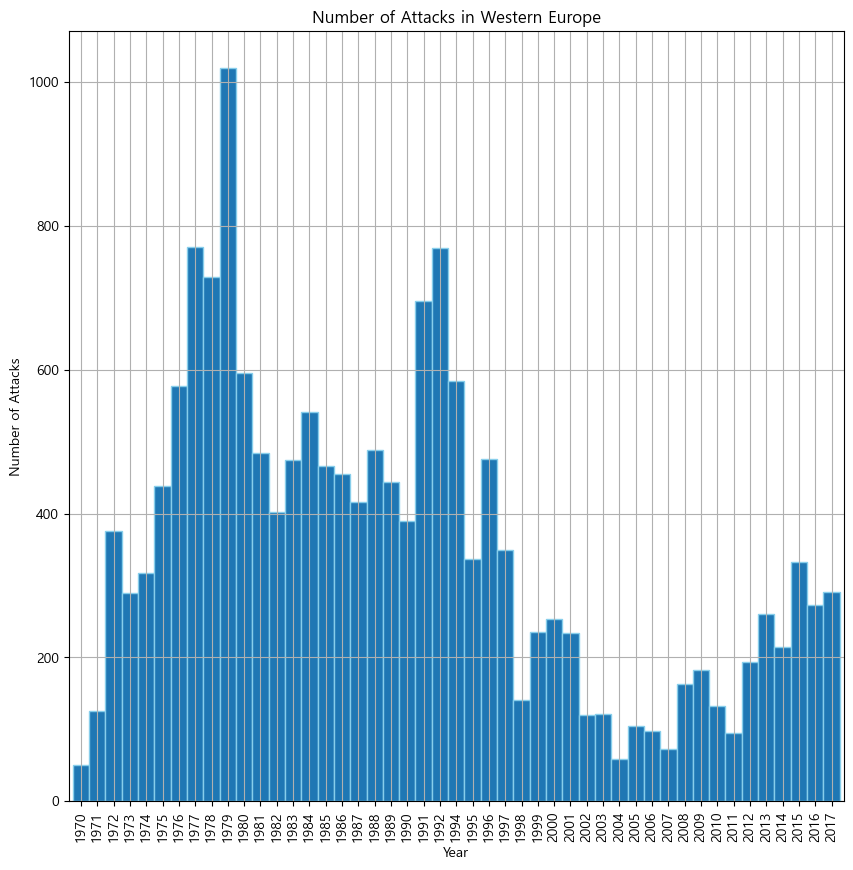

In [109]:
# 서유럽

terror_year_all.loc['Western Europe'].plot(kind='bar', figsize=(10,10),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Western Europe')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

* 서유럽의 경우에는 70년도 초반부터 테러가 급증하여 1979년에는 최대치를 찍은 것으로 나타난다. 이 시기는 다양한 좌파 및 민족조의 단체가 테러를 자행하던 시기로 이데올로기적 갈등이 극에 달했던 시기로 보인다. 80년도 들어 약간 낮아지기는 했지만 비슷한 수준의 수를 유지하다가 90년초 급증하는 형태를 보인다. 가장 큰 원인은 그 시기 소련이 붕괴되면서 권력공백이 생기며 오는 혼란이 원인이지 싶다. 그 이후로는 계속 줄어들다 2010년대 들어서 다시 증가하고 있다.

Text(0, 0.5, 'Number of Attacks')

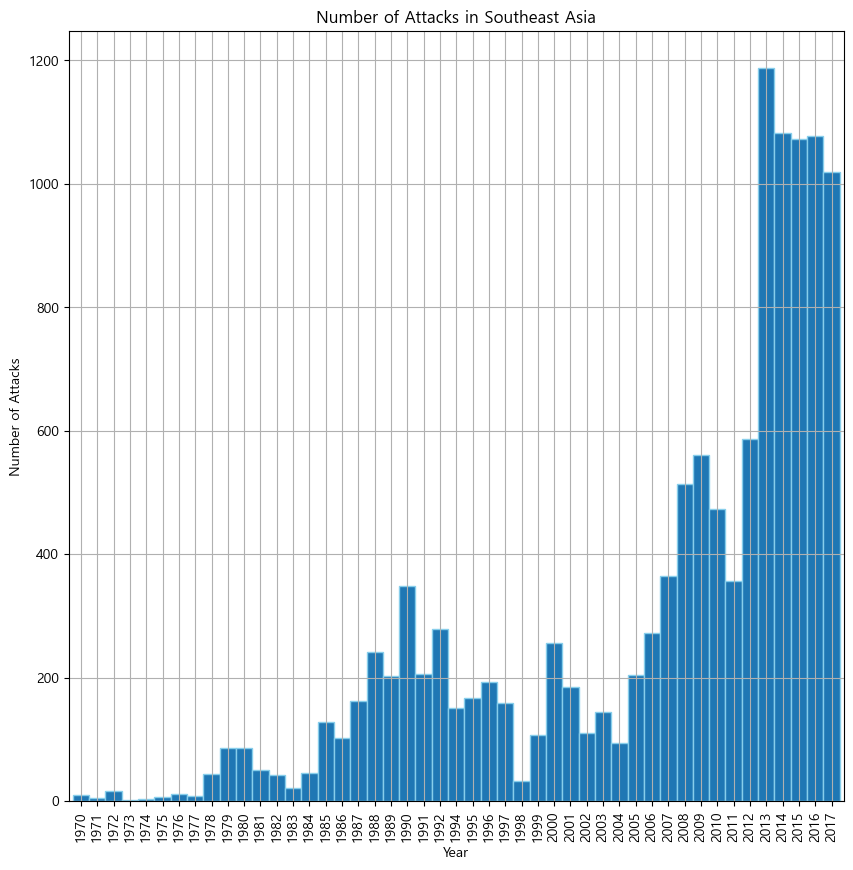

In [111]:
# 남동아시아

terror_year_all.loc['Southeast Asia'].plot(kind='bar', figsize=(10,10),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Southeast Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

* 남동아시아의 경우 80년대 후반들어 테러가 증가하기 시작하며 1990년 최대치를 찍는다. 이도 소련붕괴로 인한 시회혼란이 큰 원인으로 생각된다. 이후 감소세를 보이다가 2000년대 후반에 들어 급증하는 형태를 보인다. 그 증가하는 비율이 다른 지역에 비해 상당히 가파는 것이 특징이다.

Text(0, 0.5, 'Number of Attacks')

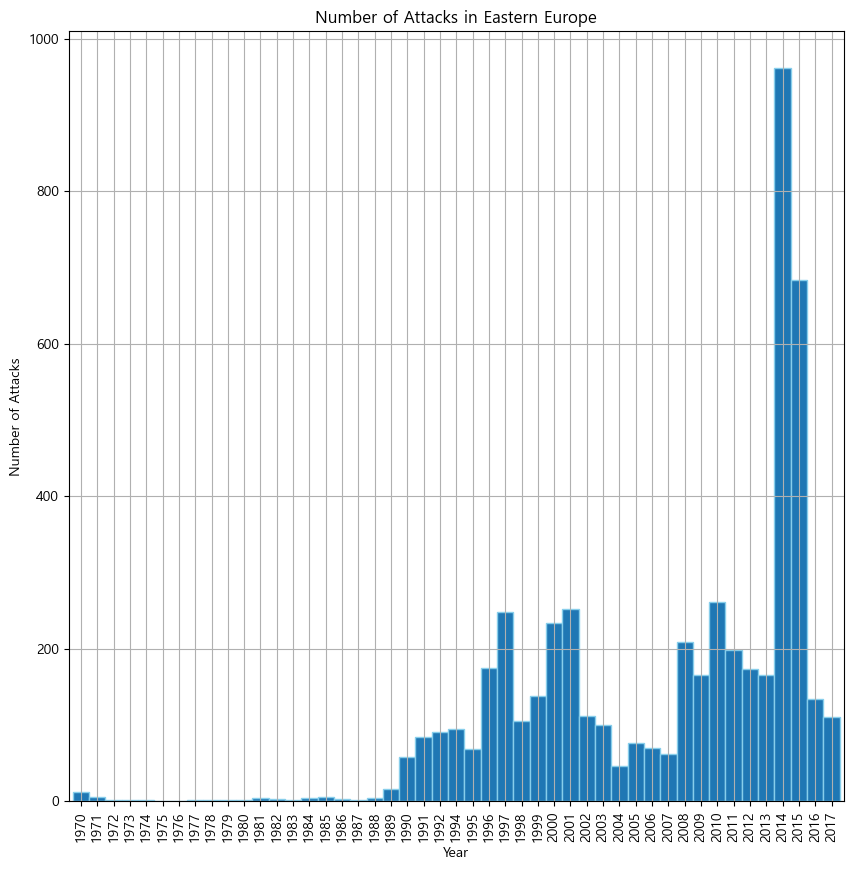

In [112]:
# 동유럽

terror_year_all.loc['Eastern Europe'].plot(kind='bar', figsize=(10,10),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in Eastern Europe')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

* 동유럽의 경우 70~80년대에는 이렇다할 테러가 없다가 90년대 들어서 테러가 증가하는 형태를 보인다. 90년도 후반 및 2000년도 초반에 들어서 테러가 급증하고 다시 줄어든다. 그리고 2014년 급증한 것으로 보이는데 이는 유럽내 이슬람 테러리즘의 영향으로 보인다.

Text(0, 0.5, 'Number of Attacks')

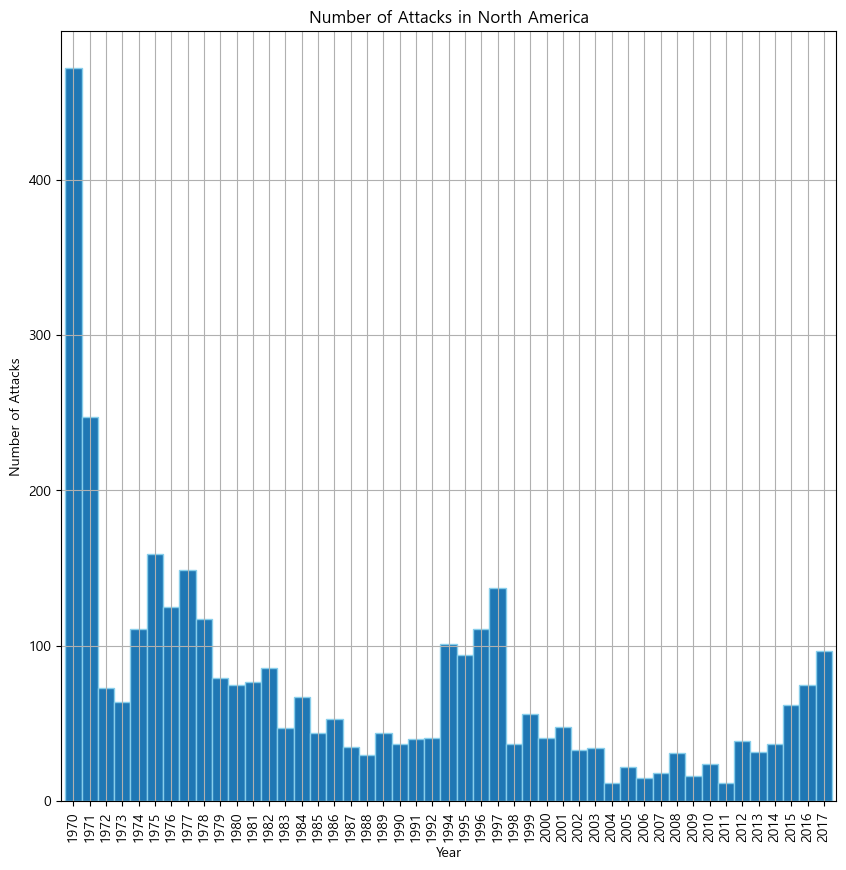

In [113]:
# 북아메리카

terror_year_all.loc['North America'].plot(kind='bar', figsize=(10,10),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in North America')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

* 북아메리카의 경우 70년도 초에 테러 수가 많은 것으로 기록되어 있다. 이는 미국내 좌파세력으로 인한 테러로 인한 집계인 것으로 보이며 그 이후로는 감소세를 보인다. 90년도 후반에 들어 테러의 수가 증가했다. 그 이후로는 테러의 수가 급감하였다. 2010년도 들어 증가세를 보이고 있다.

Text(0, 0.5, 'Number of Attacks')

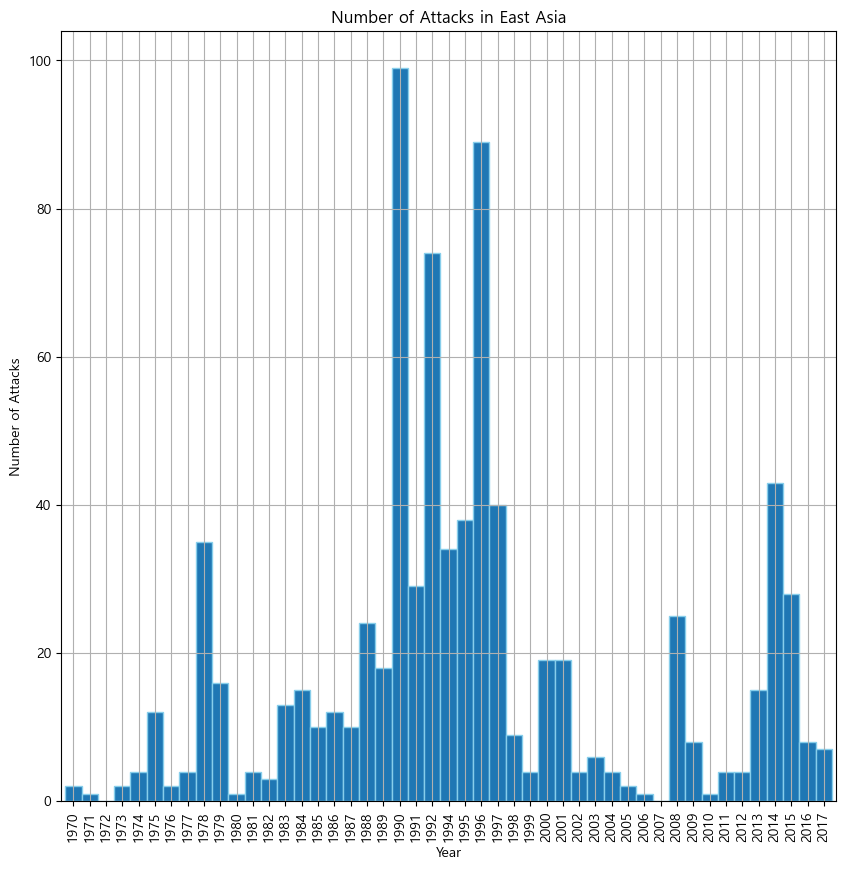

In [114]:
# 동아시아

terror_year_all.loc['East Asia'].plot(kind='bar', figsize=(10,10),grid=True,width=1.0,edgecolor='skyblue')
plt.title('Number of Attacks in East Asia')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

* 동아시아의 경우 70년대 78년 테러수가 증가하지만 80년대 들어서 다시 감소하는 형태를 보입니다. 하지만 90년대 들어 증가세를 보이며 1990년에는 최고치를 찍으며 급증했다가 감소했다가 하는 형태를 보인다. 2000년도 들어서는 감소세를 보이다 2000년도 후반 2008년도 테러수가 급증하고 또 이후 2014년에 급증하는 등 년도에 따라 순차적인 증가하는 형태가 아닌 급증했다가 감소하는 형태가 많습니다.

---

### 8. 데이터 분석

In [123]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   country_t    181691 non-null  object 
 4   region_t     181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   attack_type  181691 non-null  object 
 9   killed       171378 non-null  float64
 10  wounded      165380 non-null  float64
 11  target       181055 non-null  object 
 12  summary      115562 non-null  object 
 13  group        181691 non-null  object 
 14  target_type  181691 non-null  object 
 15  weapon_type  181691 non-null  object 
 16  motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

* motive 컬럼에 유독 많은 null값이 있는 것으로 확인된다

In [125]:
terror_motive = terror['motive'].unique()
for i in range(len(terror_motive)):
    print(f'{i} : {terror_motive[i]}')

0 : nan
1 : To protest the Cairo Illinois Police Deparment
2 : To protest the War in Vietnam and the draft
3 : Protest the draft and Vietnam War
4 : To protest United States owned businesses in Puerto Rico
5 : Suspected motives were to protest the Vietnam War and/or show support for the Black Panther Party and/or show support for the Young Lords.
6 : Retaliation for the store owner who shot and killed an African American attempting to commit a robbery at his store.
7 : The incident took place during disturbances between the Black Student Union and the university.
8 : The incident took place during heightened antiwar sentiments in Seattle Washington.
9 : Intimidate the Black Panther Party.
10 : The attack occurred during the violent Iowa Beef Packers strike in South Sioux City.
11 : The motive of the attack was to prevent the African American community of West Point Mississippi from organizing.
12 : To kill police
13 : African American opposition to the school integration plan institute

In [135]:
terror_copy = terror.copy()

* motive 유무에 따라 시각화를 진행해보기로 한다.

In [145]:
terror_copy['motive'].loc[terror_copy['motive'].notnull()] = 1

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_40444\1499372735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_copy['motive'].loc[terror_copy['motive'].notnull()] = 1


In [146]:
terror_copy['motive'].loc[terror_copy['motive'].isnull()] = 0

C:\Users\ysj_1\AppData\Local\Temp\ipykernel_40444\4188425571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_copy['motive'].loc[terror_copy['motive'].isnull()] = 0


In [147]:
terror_copy['motive'].unique()

array([0, 1], dtype=object)

In [148]:
terror_copy.head()

year  month  day           country_t                     region_t  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                     attack_type  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   killed  wounded                   target summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                group                  target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  weapon_type motive  casualities  
0     Unknown      0          1.0  
1     Unknown      0          0.0  
2     Unknown      0          1.0  
3  Explosives      0          NaN  
4  Incendiary      0          NaN

In [152]:
terror_sorted_motive = terror_copy.pivot_table(index='region_t',columns='motive',values='casualities',aggfunc=sum)
terror_sorted_motive

motive                              0         1
region_t                                       
Australasia & Oceania           348.0      61.0
Central America & Caribbean   34344.0     186.0
Central Asia                   2073.0     896.0
East Asia                      8471.0    1532.0
Eastern Europe                 7367.0   10872.0
Middle East & North Africa   181921.0  147886.0
North America                  5031.0   21367.0
South America                 37104.0    6458.0
South Asia                   134525.0   99841.0
Southeast Asia                23466.0   17375.0
Sub-Saharan Africa            71889.0   37101.0
Western Europe                15876.0    6902.0

In [156]:
terror_sorted_motive.columns = ['motive_x','motive_o']
terror_sorted_motive

motive_x  motive_o
region_t                                       
Australasia & Oceania           348.0      61.0
Central America & Caribbean   34344.0     186.0
Central Asia                   2073.0     896.0
East Asia                      8471.0    1532.0
Eastern Europe                 7367.0   10872.0
Middle East & North Africa   181921.0  147886.0
North America                  5031.0   21367.0
South America                 37104.0    6458.0
South Asia                   134525.0   99841.0
Southeast Asia                23466.0   17375.0
Sub-Saharan Africa            71889.0   37101.0
Western Europe                15876.0    6902.0

* 대부분의 지역에서 동기가 없는 테러에 의한 희생이 더 많은 것을 확인할 수 있다.

In [172]:
terror_sorted_motive['rate'] = terror_sorted_motive['motive_x'] / terror_sorted_motive['motive_o']
terror_sorted_motive

motive_x  motive_o        rate
region_t                                                   
Australasia & Oceania           348.0      61.0    5.704918
Central America & Caribbean   34344.0     186.0  184.645161
Central Asia                   2073.0     896.0    2.313616
East Asia                      8471.0    1532.0    5.529373
Eastern Europe                 7367.0   10872.0    0.677612
Middle East & North Africa   181921.0  147886.0    1.230143
North America                  5031.0   21367.0    0.235457
South America                 37104.0    6458.0    5.745432
South Asia                   134525.0   99841.0    1.347392
Southeast Asia                23466.0   17375.0    1.350561
Sub-Saharan Africa            71889.0   37101.0    1.937657
Western Europe                15876.0    6902.0    2.300203

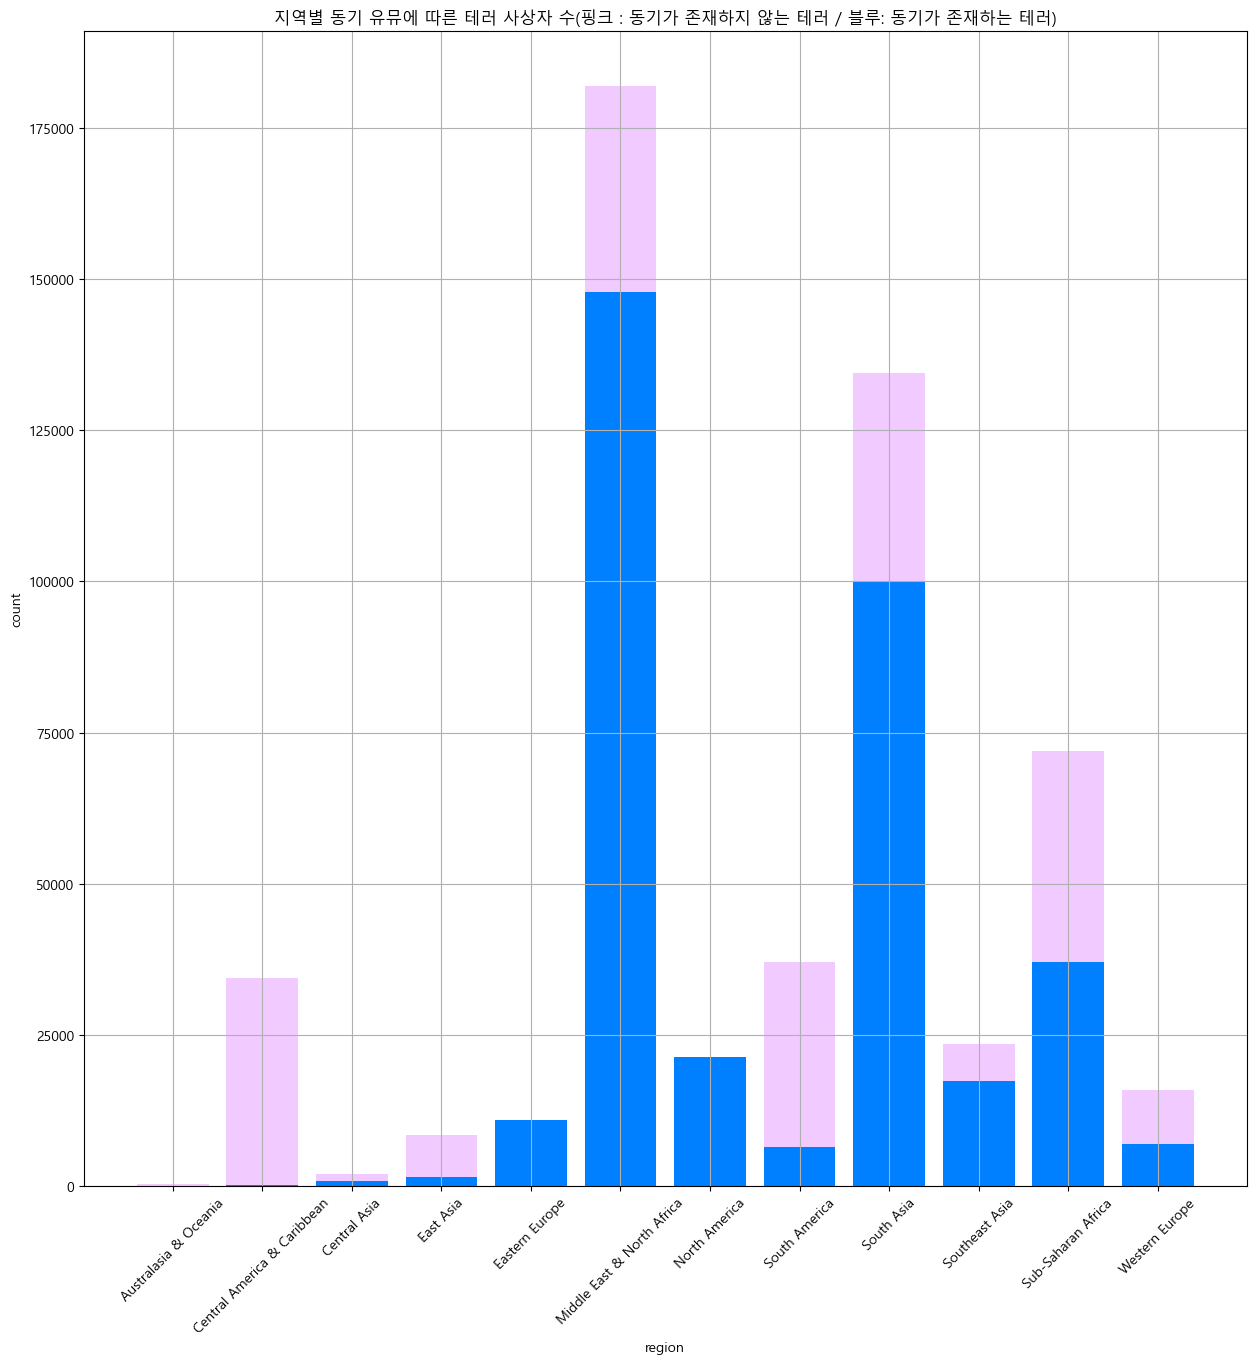

In [171]:
plt.subplots(figsize=(15,15))
plt.bar(x=terror_sorted_motive.index,height=terror_sorted_motive['motive_x'],color='#f1cbff')
plt.bar(x=terror_sorted_motive.index,height=terror_sorted_motive['motive_o'],color='#007fff')
plt.xticks(rotation=45)
plt.xlabel('region')
plt.ylabel('count')
plt.title('지역별 동기 유뮤에 따른 테러 사상자 수(핑크 : 동기가 존재하지 않는 테러 / 블루: 동기가 존재하는 테러)')
plt.grid(True)
plt.show()

* 위 그래프는 지역별 동기 유뮤에 따른 테러 사상자 수(핑크 : 동기가 존재하지 않는 테러 / 블루: 동기가 존재하는 테러)를 시각화한 그래프이다. 동기유무에 따른 그래프를 겹쳐서 동기가 존재하지 않는 테러로 인한 사상자가 많은 경우 그래프의 끝부분의 핑크 색상의 정도로 확인할 수 있다.

* 대부분의 지역에서 동기가 없는 테러로 인해 사상한 희생자가 더 많은 것을 확인할 수 있다. 

* 만일 테러가 목적의식이 있는 행위라고 가정한다면 더더욱 동기를 확고히 하고 외부에 전달을 하여 메시지를 전달하려고 노력할 것이다. 

* 그런데 실제 통계상 확인된 바 동기가 확인되지 않은 테러에 희생된 사상자수가 더 많은 것을 확인 할 수 있다. 

* 이를 통해 테러의 '악'의 측면에서 무섭고 어두운 면을 확인할 수 있다고 판단한다.